In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from matplotlib.colors import hsv_to_rgb
import warnings
from functions_master import *
from glob import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact, FloatSlider
import numpy as np
import pandas as pd
import scipy as sp

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
c = 0.299792458 # speed of light mm/ps

In [3]:
# sample1_ang_csv = os.path.join(ruta_actual,"sample1_ang.csv")
ruta_actual = os.getcwd()
sample = 2

carpeta_sample1 = os.path.join(ruta_actual,f"EuZn2P2\\src\\sample{sample}_ang")
carpeta_ref_sample1 = os.path.join(ruta_actual,f"EuZn2P2\\src\\reference{sample}")
archivos_dat_ref = glob(os.path.join(os.path.join(carpeta_ref_sample1,f'carpeta1'), '*.dat'))
archivos_dat_samp = glob(os.path.join(os.path.join(carpeta_sample1,f'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat_samp:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

# print(archivos_dat_samp)

rang = 3
convert_dats(carpeta_ref_sample1,0)
convert_dats(carpeta_sample1,rang)

# Filtrar y ordenar los archivos por la temperatura
archivos_dat_ref = sorted(
    archivos_dat_ref,
    key=lambda x: extraer_temperatura(x)
)

archivos_dat_samp = sorted(
    archivos_dat_samp,
    key=lambda x: extraer_temperatura(x)
)

Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_10.15K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_124.0K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_14.5K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_147.8K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_170.5K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_192.4K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_213.6K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample2_ang\carpeta1\Average_234.4K.dat elim

In [5]:

def anim2(left, right_sample, right_subs, index, right_sample_fix, right_subs_fix,left_fix):
    right_ref = right_subs
    N = 2**15

    f = plt.figure(figsize=(10, 8), dpi=200)  # Aumenté el tamaño para 3 subplots

    # Grid: 2 filas, 2 columnas (la última celda ocupará ambas columnas)
    gs = gridspec.GridSpec(2, 1)

    # Subgráficos
    ax1 = plt.subplot(gs[0, 0])  # Señales temporales (original)
    ax2 = plt.subplot(gs[1, 0])  # FFTs (nuevo)
    # ax3 = plt.subplot(gs[1, :])  # Absorción (ocupa toda la fila inferior)

    # Ruta del archivo de señal y de referencia
    path_signal = archivos_dat_samp[int(index)]
    print(path_signal)
    path_ref = archivos_dat_ref[0]

    x_fix, y_fix = getFilterdata(path_signal,right_sample_fix,left_fix)
    x_ref_fix, y_ref_fix = getFilterdata(path_ref,right_subs_fix,left_fix)

    x, y = getFilterdata(path_signal, right_sample, left)
    x_ref, y_ref = getFilterdata(path_ref, right_ref, left)

    # Aplicar ventana
    y_subs= pd.Series(y_ref)
    y_signal= pd.Series(y)
    y_subs_fix= pd.Series(y_ref_fix)
    y_signal_fix= pd.Series(y_fix)

    val = 1  # Desplazamiento para visualización

    # Señales en dominio temporal (subplot 1)
    #ax1.plot(x_fix,y_fix / max(y_fix) + 2*val,'--b', label=f'Sam_fix')
    ax1.plot(x,y / max(y) + val,'b', label=f'Sam')
    ax1.plot(x_ref,y_ref / max(y_ref), 'r', label='Ref')
    #ax1.plot(x_ref_fix,y_ref_fix / max(y_ref_fix) - val, '--r', label='Ref_fix')
    
    
    # ax1.plot(ventana / max(ventana) + val, 'k--')
    ax1.set_title(f"{extraer_temperatura(path_signal)}")
    ax1.legend(loc='lower right')

    # Dominio de frecuencia
    nu = sp.fft.fftfreq(N, 1/30)
    k = 15
    nu = nu[1:len(nu)//k]

    # Aplicar Fourier y truncar
    fft_y_signal= FourierT2(y_signal, N)[1:len(nu)+1]
    fft_y_subs = FourierT2(y_subs, N)[1:len(nu)+1]
    fft_y_signal_fix= FourierT2(y_signal_fix, N)[1:len(nu)+1]
    fft_y_subs_fix = FourierT2(y_subs_fix, N)[1:len(nu)+1]

    # Máscara de frecuencia
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal = fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]
    fft_y_signal_fix = fft_y_signal_fix[mask]
    fft_y_subs_fix = fft_y_subs_fix[mask]

    # Subplot 2: FFTs
    ax2.plot(nu_filtradas, np.abs(fft_y_subs)**2/np.max(np.abs(fft_y_subs)**2),'r', label='Reference')
    #ax2.plot(nu_filtradas, np.abs(fft_y_subs_fix)**2/max(np.abs(fft_y_subs_fix)**2)*max(np.abs(fft_y_signal_fix)**2),'--r', label='Ref_fix')
    #ax2.plot(nu_filtradas, np.abs(fft_y_signal_fix)**2,'--b', label='Sam_fix')
    ax2.plot(nu_filtradas, np.abs(fft_y_signal)**2/np.max(np.abs(fft_y_signal)**2),'b', label='Sam')
    
    # ax2.set_title("Frequency Domain")
    ax2.set_ylabel("$|FFT|^{2}$")
    ax2.set_xlabel(r"$\nu$ (THz)")
    ax2.legend()

    # Transmitancia y fase
    #T = fft_y_signal_ventaneada / fft_y_subs_ventaneada #* np.exp(-1j * 2 * np.pi * nu_filtradas * phase / 30)
    
    # # Subplot 3: Absorción (ocupa toda la fila inferior)
    # ax3.plot(nu_filtradas, -2 / d * np.log(abs(T)),'b')
    # ax3.set_ylabel(r"$\alpha$")
    # ax3.set_xlabel(r"$\nu$ (THz)")
    # ax3.set_title("Absorption Spectrum")
    # # ax3.set_yscale('log')  # Descomenta si quieres escala logarítmica

    # plt.tight_layout()
    global n0,n1,n2
    n0 = left
    n1 = right_sample
    n2 = right_subs

# Interfaz interactiva (sin cambios)
opc = dict(continuous_update=False, readout_format=".3f")
interact(anim2,       
    left=FloatSlider(min=320, max=423, value=395, step=0.1, **opc),
    right_sample=FloatSlider(min=380, max=450, value=406, step=0.1, **opc),
    right_subs=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    index=FloatSlider(min=0, max=len(archivos_dat_samp) - 1, value=0, step=1, **opc),
    right_sample_fix=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    right_subs_fix=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    left_fix=FloatSlider(min=380, max=450, value=397.6, step=0.1, **opc)
)#.layout.width = '100%'  # Ajusta el ancho del widget interactivo
    

interactive(children=(FloatSlider(value=395.0, continuous_update=False, description='left', max=423.0, min=320…

<function __main__.anim2(left, right_sample, right_subs, index, right_sample_fix, right_subs_fix, left_fix)>

C:\Users\esteb\AppData\Local\Temp\ipykernel_15320\1197064640.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax1.plot(x,y / max(y) + val,'b', color=color, label=f'Sam')
C:\Users\esteb\AppData\Local\Temp\ipykernel_15320\1197064640.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax1.plot(x,y / max(y) + val,'b', color=color, label=f'Sam')
C:\Users\esteb\AppData\Local\Temp\ipykernel_15320\1197064640.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax1.plot(x,y / max(y) + val,'b', color=color, label=f'Sam')
C:\Users\esteb\AppData\Local\Temp\ipykernel_15320\1197064640.py:39: UserWarning: color is redunda

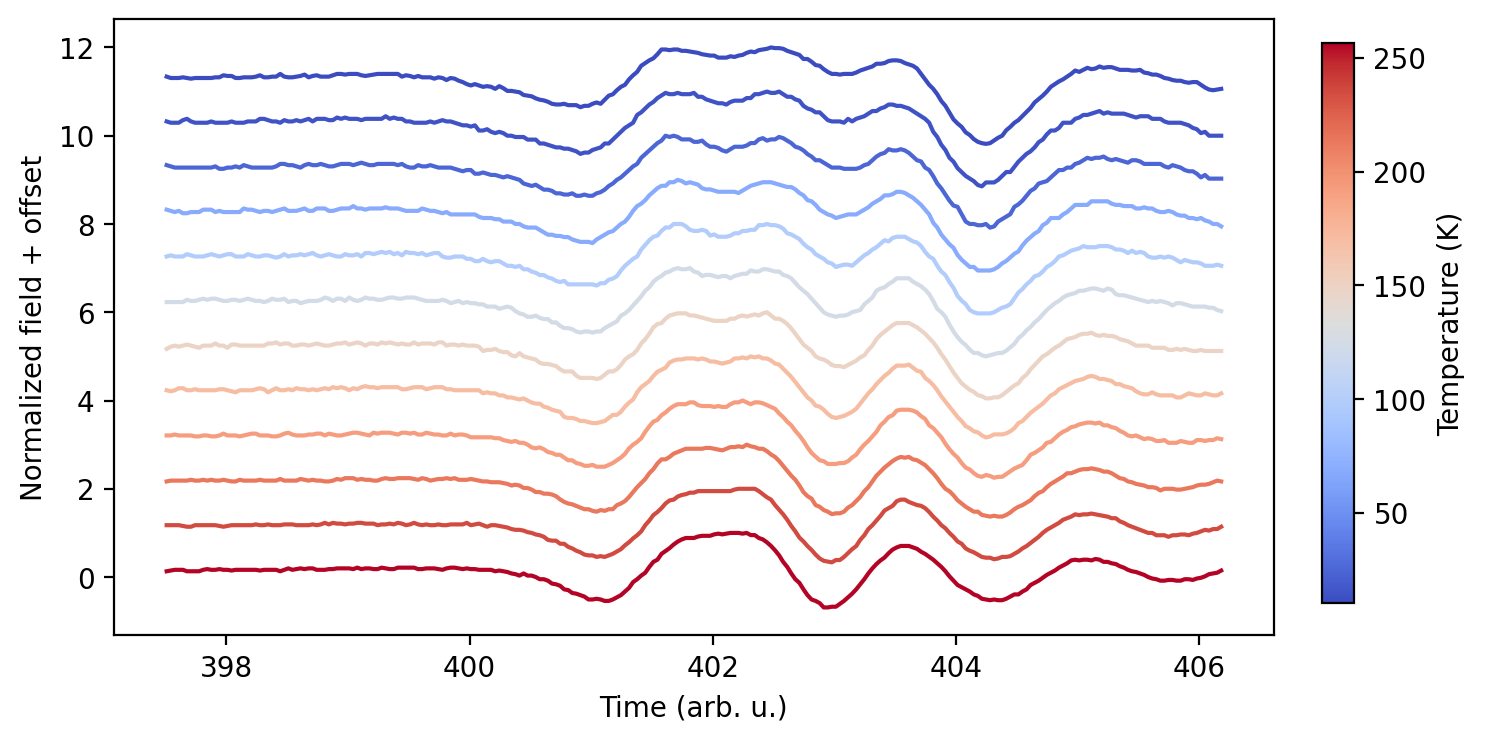

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import cm
from matplotlib.colors import Normalize
import os

def plot_all_samples(left, right_sample, right_subs):
    temps = [extraer_temperatura(p) for p in archivos_dat_samp if extraer_temperatura(p) is not None][::-1]

    if not temps:
        raise ValueError("No se encontraron temperaturas válidas en los archivos")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4), dpi=200)

    # ax1.set_title("Señal ventaneada + ventana (todas las muestras)")
    ax1.set_ylabel("Normalized field + offset")
    ax1.set_xlabel("Time (arb. u.)")
    val_offset_signal = 1
    archivos_dat_samp2 = archivos_dat_samp[::-1]  # Invertir el orden de los archivos

    for index, path_signal in enumerate(archivos_dat_samp2):
        temp = temps[index]
        color = cmap(norm(temp)) if temp is not None else 'blue'
        # Ruta del archivo de señal y de referencia


        x, y = getFilterdata(path_signal, right_sample, left)
        # x_ref, y_ref = getFilterdata(path_ref, right_ref, left)

        val = 1*index  # Desplazamiento para visualización

        # Señales en dominio temporal (subplot 1)
        ax1.plot(x,y / max(y) + val,'b', color=color, label=f'Sam')

    # Barra de temperatura al costado
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, cax=cbar_ax, label='Temperature (K)')

    # plt.show()

# Ejecutar la función
plot_all_samples(left=n0, right_sample=n1, right_subs=n2)


In [ ]:
import matplotlib.animation as animation
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from colorsys import hsv_to_rgb
import matplotlib.cm as cm
from matplotlib.colors import Normalize


def create_frame(index, left, right_sample, right_subs, axes, norm, cmap):
    ax1 = axes[0]  # Solo trabajamos con el primer eje

    # Limpiar solo el eje que vamos a usar
    ax1.clear()

    path_signal = archivos_dat_samp[int(index)]
    temp = extraer_temperatura(path_signal)
    color = cmap(norm(temp)) if temp is not None else 'blue'
    path_ref = archivos_dat_ref[0]

    x, y = getFilterdata(path_signal, right_sample, left)
    x_ref, y_ref = getFilterdata(path_ref, right_subs, left)

    val = 1  # Desplazamiento para visualización

    # Señales en dominio temporal (subplot 1)
    line1 = ax1.plot(x, y / max(y) + val, color=color, label=f'Sam')[0]
    line2 = ax1.plot(x_ref, y_ref / max(y_ref), '--k', label='Ref')[0]
    # Líneas verticales en posiciones a y b
    a = 406  # Reemplaza con tu valor deseado
    b = 410   # Reemplaza con tu valor deseado
    line_a = ax1.axvline(a, color='red', linestyle='--', alpha=0.5)
    line_b = ax1.axvline(b, color='red', linestyle='--', alpha=0.5, label='First reflection')
    ax1.set_title(f"{int(extraer_temperatura(path_signal))} K")
    ax1.legend(loc='lower right')

    # Devolver los artistas que han sido modificados
    return [line1, line2, line_a, line_b]
def generate_gif():
    temps = []
    for path in archivos_dat_samp:
        temp = extraer_temperatura(path)
        if temp is not None:
            temps.append(temp)

    if not temps:
        raise ValueError("No se encontraron temperaturas válidas en los archivos")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    left = n0
    right_sample = n1
    right_subs = n2

    fig = plt.figure(figsize=(7, 4), dpi=200)
    gs = gridspec.GridSpec(1, 1)
    ax1 = plt.subplot(gs[0, 0])
    axes = [ax1]

    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, cax=cbar_ax, label='Temperature (K)')

    def animate(i):
        return create_frame(i, left, right_sample, right_subs, axes, norm, cmap)

    carpeta = os.getcwd()
    ruta_guardado = os.path.join(carpeta, 'animacion_datos180_OFF.gif')
    
    # Asegúrate de que hay suficientes frames
    num_frames = len(archivos_dat_samp)
    if num_frames == 0:
        raise ValueError("No hay archivos para animar")
    
    ani = animation.FuncAnimation(
        fig, animate, 
        frames=num_frames, 
        interval=400, 
        blit=True  # Habilitar blitting para mejor rendimiento
    )
    
    ani.save(ruta_guardado, writer=animation.PillowWriter(fps=2), dpi=200)
    plt.close()


In [69]:
generate_gif()

In [10]:

def anim2(left, right_sample, right_subs, index, right_sample_fix, right_subs_fix,left_fix):
    right_ref = right_subs
    N = 2**15

    f = plt.figure(figsize=(10, 8), dpi=200)  # Aumenté el tamaño para 3 subplots

    # Grid: 2 filas, 2 columnas (la última celda ocupará ambas columnas)
    gs = gridspec.GridSpec(2, 1)

    # Subgráficos
    ax1 = plt.subplot(gs[0, 0])  # Señales temporales (original)
    ax2 = plt.subplot(gs[1, 0])  # FFTs (nuevo)
    # ax3 = plt.subplot(gs[1, :])  # Absorción (ocupa toda la fila inferior)

    # Ruta del archivo de señal y de referencia
    path_signal = archivos_dat_samp[int(index)]
    path_ref = archivos_dat_ref[0]

    x_fix, y_fix = getFilterdata(path_signal,right_sample_fix,left_fix)
    x_ref_fix, y_ref_fix = getFilterdata(path_ref,right_subs_fix,left_fix)

    x, y = getFilterdata(path_signal, right_sample, left)
    x_ref, y_ref = getFilterdata(path_ref, right_ref, left)

    # Aplicar ventana
    y_subs= pd.Series(y_ref)
    y_signal= pd.Series(y)
    y_subs_fix= pd.Series(y_ref_fix)
    y_signal_fix= pd.Series(y_fix)

    val = 1  # Desplazamiento para visualización

    # Señales en dominio temporal (subplot 1)
    ax1.plot(x_fix,y_fix / max(y_fix) + 2*val,'--b', label=f'Sam_fix')
    ax1.plot(x,y / max(y) + val,'b', label=f'Sam')
    ax1.plot(x_ref,y_ref / max(y_ref), 'r', label='Ref')
    ax1.plot(x_ref_fix,y_ref_fix / max(y_ref_fix) - val, '--r', label='Ref_fix')
    
    
    # ax1.plot(ventana / max(ventana) + val, 'k--')
    ax1.set_title(f"{extraer_temperatura(path_signal)}")
    ax1.legend(loc='lower right')

    # Dominio de frecuencia
    nu = sp.fft.fftfreq(N, 1/30)
    k = 15
    nu = nu[1:len(nu)//k]

    # Aplicar Fourier y truncar
    fft_y_signal= FourierT2(y_signal, N)[1:len(nu)+1]
    fft_y_subs = FourierT2(y_subs, N)[1:len(nu)+1]
    fft_y_signal_fix= FourierT2(y_signal_fix, N)[1:len(nu)+1]
    fft_y_subs_fix = FourierT2(y_subs_fix, N)[1:len(nu)+1]

    # Máscara de frecuencia
    xmin, xmax = 0.3, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal = fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]
    fft_y_signal_fix = fft_y_signal_fix[mask]
    fft_y_subs_fix = fft_y_subs_fix[mask]

    # Subplot 2: FFTs
    ax2.plot(nu_filtradas, np.abs(fft_y_subs)**2,'r', label='Reference')
    ax2.plot(nu_filtradas, np.abs(fft_y_subs_fix)**2/max(np.abs(fft_y_subs_fix)**2)*max(np.abs(fft_y_signal_fix)**2),'--r', label='Ref_fix')
    ax2.plot(nu_filtradas, np.abs(fft_y_signal_fix)**2,'--b', label='Sam_fix')
    ax2.plot(nu_filtradas, np.abs(fft_y_signal)**2,'b', label='Sam')
    
    # ax2.set_title("Frequency Domain")
    ax2.set_ylabel("$|FFT|^{2}$")
    ax2.set_xlabel(r"$\nu$ (THz)")
    ax2.legend()

    # Transmitancia y fase
    #T = fft_y_signal_ventaneada / fft_y_subs_ventaneada #* np.exp(-1j * 2 * np.pi * nu_filtradas * phase / 30)
    
    # # Subplot 3: Absorción (ocupa toda la fila inferior)
    # ax3.plot(nu_filtradas, -2 / d * np.log(abs(T)),'b')
    # ax3.set_ylabel(r"$\alpha$")
    # ax3.set_xlabel(r"$\nu$ (THz)")
    # ax3.set_title("Absorption Spectrum")
    # # ax3.set_yscale('log')  # Descomenta si quieres escala logarítmica

    # plt.tight_layout()

# Interfaz interactiva (sin cambios)
opc = dict(continuous_update=False, readout_format=".3f")
interact(anim2,       
    left=FloatSlider(min=320, max=423, value=404.9, step=0.1, **opc),
    right_sample=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    right_subs=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    index=FloatSlider(min=0, max=len(archivos_dat_samp) - 1, value=0, step=1, **opc),
    right_sample_fix=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    right_subs_fix=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    left_fix=FloatSlider(min=380, max=450, value=397.6, step=0.1, **opc)
)#.layout.width = '100%'  # Ajusta el ancho del widget interactivo
    

interactive(children=(FloatSlider(value=404.9, continuous_update=False, description='left', max=423.0, min=320…

<function __main__.anim2(left, right_sample, right_subs, index, right_sample_fix, right_subs_fix, left_fix)>

# Transmitance spectrum

In [ ]:
def create_frame(index, left, right_sample, right_subs, axes, norm, cmap):
    ax1, ax2 = axes
    for ax in axes:
        ax.clear()

    N = 2**15
    try:
        path_signal = archivos_dat_samp[int(index)]
        temp = extraer_temperatura(path_signal)
        color = cmap(norm(temp)) if temp is not None else 'blue'
        path_ref = archivos_dat_ref[0]

        x, y = getFilterdata(path_signal, right_sample, left)
        x_ref, y_ref = getFilterdata(path_ref, right_subs, left)

        y = np.array(y)
        y_ref = np.array(y_ref)

        if np.max(np.abs(y)) == 0 or np.max(np.abs(y_ref)) == 0:
            raise ValueError("Señales vacías")

        # Subplot 1
        val = 1
        line1 = ax1.plot(x, y / max(y) + val, color=color, label='Sam')[0]
        line2 = ax1.plot(x_ref, y_ref / max(y_ref), 'r', label='Ref')[0]
        ax1.set_title(f"Temperatura: {temp} K")
        ax1.legend(loc='lower right')

        # Subplot 2
        y_subs = pd.Series(y_ref)
        y_signal = pd.Series(y)
        nu = sp.fft.fftfreq(N, 1/30)[:N//2]
        k = 15
        nu = nu[1:N//k]

        fft_y_signal= FourierT2(y_signal, N)[1:len(nu)+1]
        fft_y_subs = FourierT2(y_subs, N)[1:len(nu)+1]

        xmin, xmax = 0.2, 1.0
        mask = (nu >= xmin) & (nu <= xmax)
        nu_filtradas = nu[mask]
        fft_y_signal = fft_y_signal[mask]
        fft_y_subs = fft_y_subs[mask]

        if np.max(fft_y_signal) == 0 or np.max(fft_y_subs) == 0:
            raise ValueError("FFT vacía")

        line3 = ax2.plot(nu_filtradas, np.abs(fft_y_subs)**2/np.max(np.abs(fft_y_subs)**2), 'r', label='Ref')[0]
        line4 = ax2.plot(nu_filtradas, np.abs(fft_y_signal)**2/np.max(np.abs(fft_y_signal)**2), 'b', label='Sam')[0]
        ax2.set_ylabel("$|FFT|^{2}$ (normalizado)")
        ax2.set_xlabel(r"$\nu$ (THz)")
        ax2.legend()

    except Exception as e:
        print(f"[WARN] Frame {index} falló: {e}")
        # Crear líneas vacías
        line1 = ax1.plot([], [])[0]
        line2 = ax1.plot([], [])[0]
        line3 = ax2.plot([], [])[0]
        line4 = ax2.plot([], [])[0]

    return [line1, line2, line3, line4]


def generate_gif2():
    temps = []
    for path in archivos_dat_samp:
        temp = extraer_temperatura(path)
        if temp is not None:
            temps.append(temp)
    if not temps:
        raise ValueError("No se encontraron temperaturas válidas.")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    left = n0
    right_sample = n1
    right_subs = n2

    fig = plt.figure(figsize=(10, 5), dpi=200)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    axes = [ax1, ax2]

    # Barra de color
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, cax=cbar_ax, label='Temperatura (K)')

    def animate(i):
        return create_frame(i, left, right_sample, right_subs, axes, norm, cmap)

    output_path = os.path.join(os.getcwd(), 'animacion_espectro_180_on.gif')
    # Asegúrate de que hay suficientes frames
    num_frames = len(archivos_dat_samp)
    if num_frames == 0:
        raise ValueError("No hay archivos para animar")
    ani = animation.FuncAnimation(
        fig, animate, 
        frames=num_frames, 
        interval=400, 
        blit=False  # Habilitar blitting para mejor rendimiento
    )
    ani.save(output_path, writer=animation.PillowWriter(fps=2), dpi=200)
    plt.close()

In [122]:
generate_gif2()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


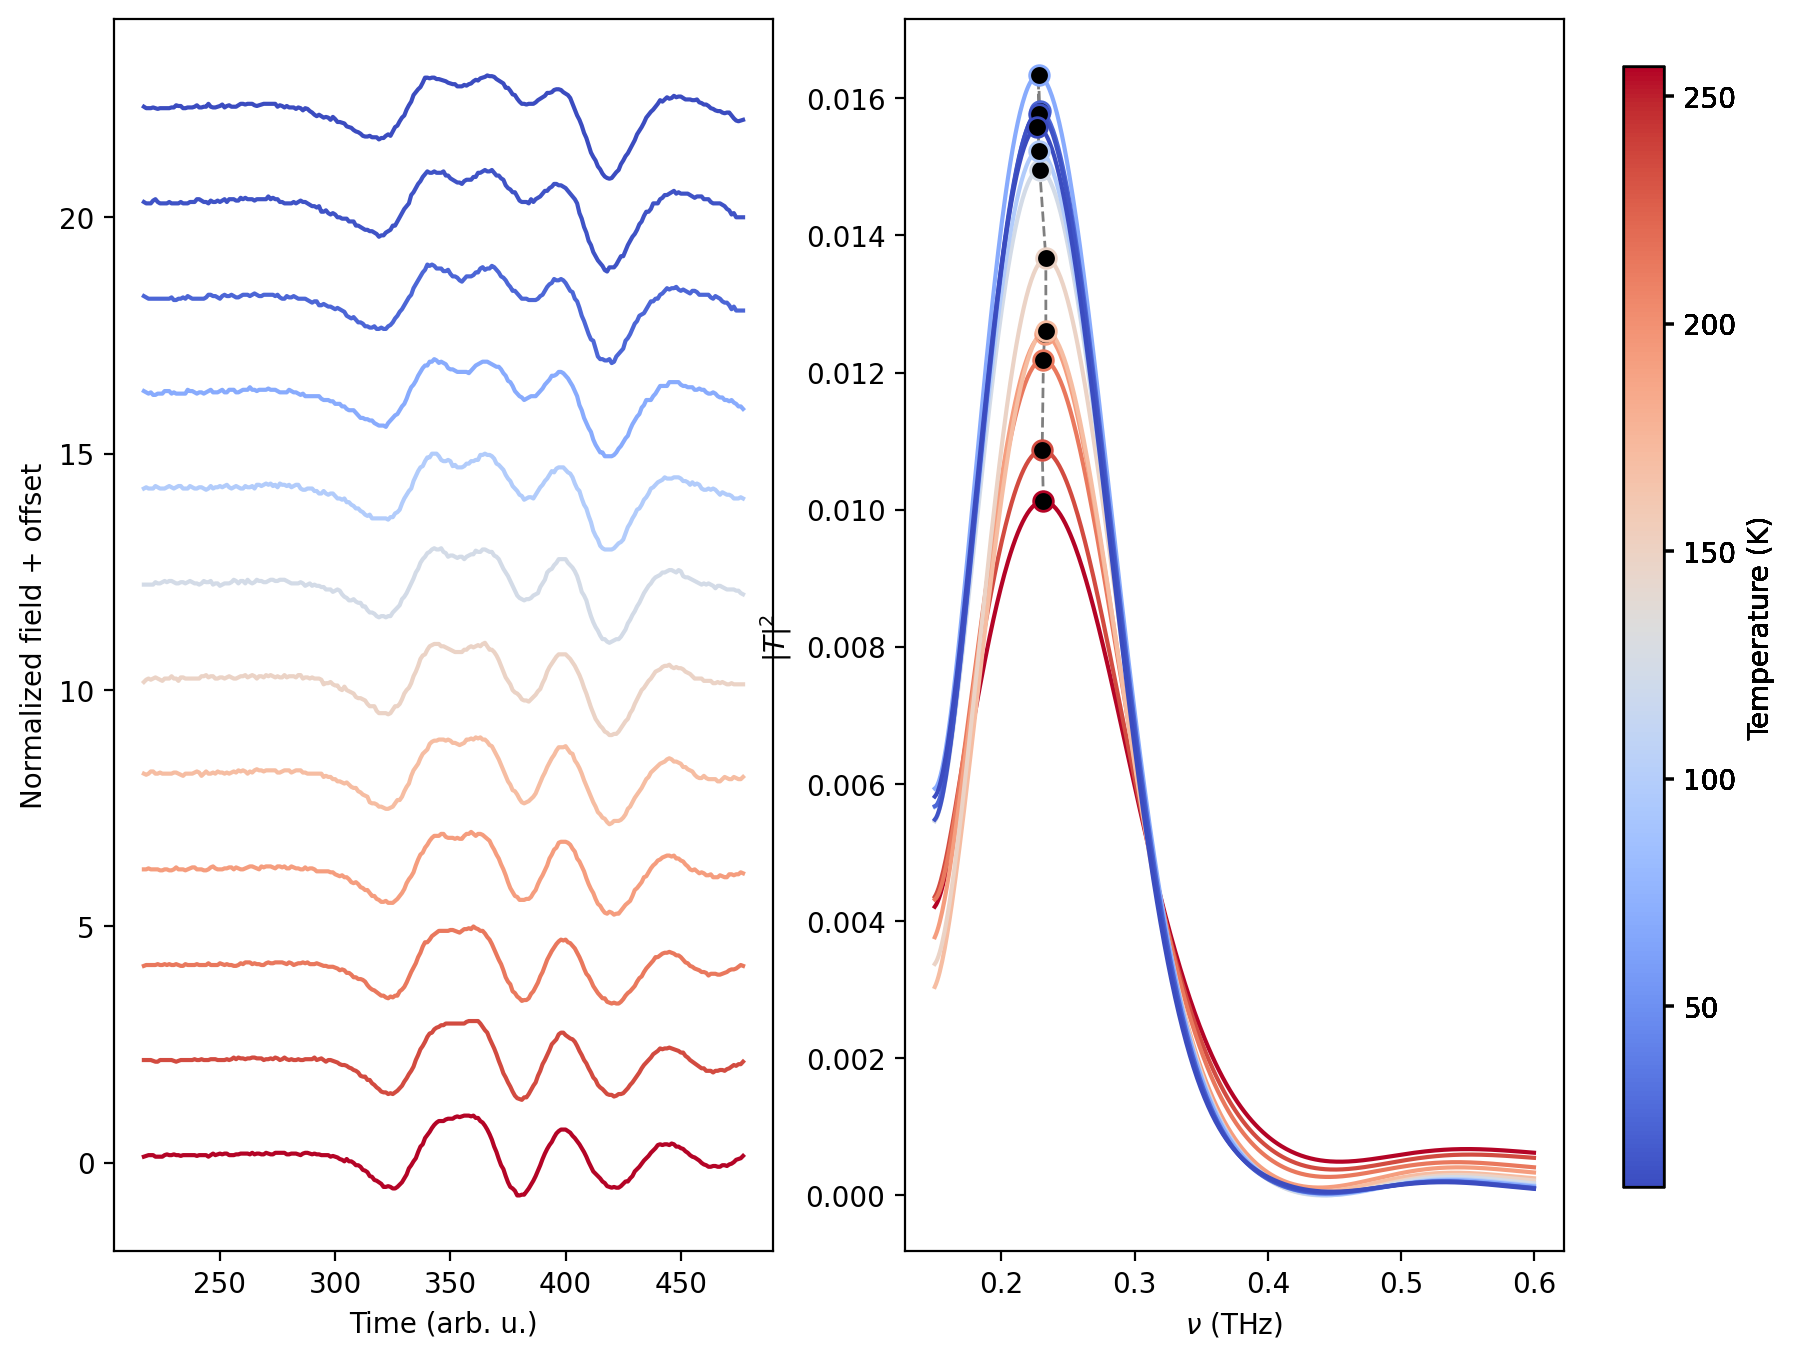

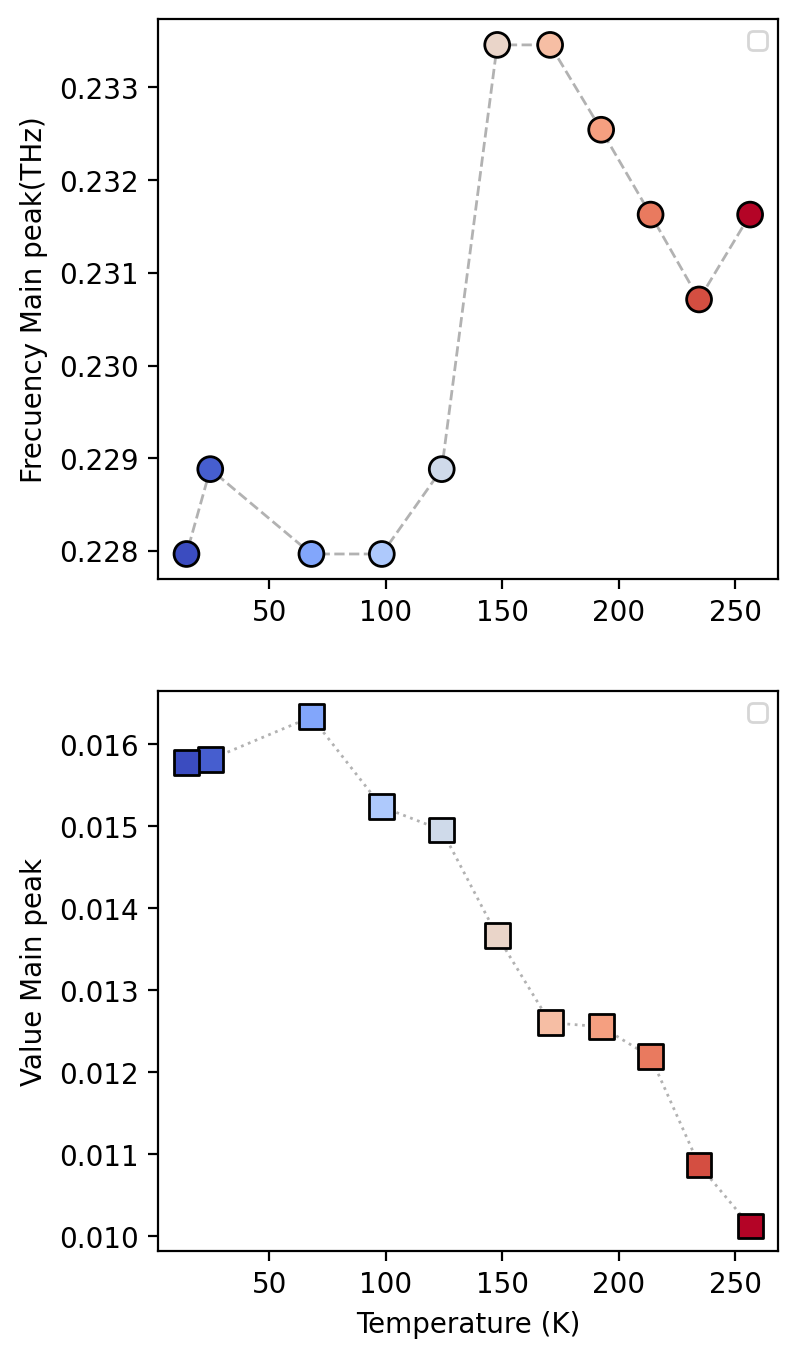

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import cm
from matplotlib.colors import Normalize
import os

def plot_all_samples(left, right_sample, right_subs, val_offset_signal=2, val_offset_kappa=0.03):
    temps = [extraer_temperatura(p) for p in archivos_dat_samp if extraer_temperatura(p) is not None][::-1]

    if not temps:
        raise ValueError("No se encontraron temperaturas válidas en los archivos")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    N = 2**15
    fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(10, 8), dpi=200)

    # ax1.set_title("Señal ventaneada + ventana (todas las muestras)")
    ax1.set_ylabel("Normalized field + offset")
    ax1.set_xlabel("Time (arb. u.)")

    # ax4.set_title(r"Coeficiente de extinción $\kappa$ (todas las muestras)")
    ax4.set_xlabel(r"$\nu$ (THz)")
    ax4.set_ylabel(r"$|T|^{2}$ ")

    max1_freqs = []
    max1_values = []
    max2_freqs = []
    max2_values = []


    for index, path_signal in enumerate(archivos_dat_samp[::-1]):
        temp = temps[index]
        color = cmap(norm(temp)) if temp is not None else 'blue'
        path_ref = archivos_dat_ref[0]

        x, y = getFilterdata(path_signal, right_sample, left)
        x_ref, y_ref = getFilterdata(path_ref, right_subs, left)

        y_subs_ventana = pd.Series(y_ref)
        y_signal_ventaneada = pd.Series(y)

        offset_signal = val_offset_signal * index

        ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + offset_signal, color=color, label=f'{temp:.1f} K')

        # FFT y kappa
        k = 15
        nu = sp.fft.fftfreq(N, 1 / 30)
        fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)//k]
        fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)//k]

        nu = nu[1:len(nu)//k]
        xmin, xmax = 0.15, 0.6
        mask = (nu >= xmin) & (nu <= xmax)

        fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
        fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
        nu_filtradas = nu[mask]

        val_offset_kappa = 0.8
        offset_kappa = val_offset_kappa * index
        T = np.abs(fft_y_signal_ventaneada/fft_y_subs_ventaneada)**2
        normalized_fft = T
        
        ax4.plot(nu_filtradas, normalized_fft, color=color, label=f'{temp:.1f} K')
        # Graficamos ambos puntos máximos
        

            # Barra de temperatura al costado
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
        sm = cm.ScalarMappable(norm=norm, cmap=cmap)
        fig.colorbar(sm, cax=cbar_ax, label='Temperature (K)')

        max1_idx = np.argmax(normalized_fft)
        max1_freq = nu_filtradas[max1_idx]
        max1_val = normalized_fft[max1_idx]
        ax4.scatter(max1_freq, max1_val, color='black', edgecolors=color, s=50, zorder=5)
        

        max2_idx = np.argmax(T)
        max2_freq = nu_filtradas[max2_idx]
        max2_val = T[max2_idx]
        
        # Guardamos los máximos
        max1_freqs.append(max1_freq)
        max1_values.append(max1_val)
        max2_freqs.append(max2_freq)
        max2_values.append(max2_val)
       


        # plt.show()
    ax4.plot(max1_freqs, max1_values, 'k--', linewidth=1, alpha=0.5, label='1er máximo')
        # Crear nueva figura para frecuencia vs temperatura
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4, 8), dpi=200)

    # Graficar primer máximo (principal)
    ax1.scatter(temps[:-1], max1_freqs[:-1], c=temps[:-1], cmap='coolwarm', 
                edgecolors='k', s=80, zorder=3)
    ax1.set_ylabel('Frecuency Main peak(THz)')
    ax1.legend(loc='upper right', fontsize='small')
    ax1.plot(temps[:-1], max1_freqs[:-1], 'k--', alpha=0.3, linewidth=1)

    # Graficar segundo máximo (secundario, solo si existen valores válidos)
    valid_max2 = [(t, f) for t, f in zip(temps, max2_values) if not np.isnan(f)]
    if valid_max2:
        temps_max2, freqs_max2 = zip(*valid_max2)
        ax2.scatter(temps_max2[:-1], freqs_max2[:-1], c=temps_max2[:-1], cmap='coolwarm', 
                    edgecolors='k', s=80, marker='s', zorder=3)
        ax2.set_xlabel('Temperature (K)')
        ax2.set_ylabel('Value Main peak')
        ax2.legend(loc='upper right', fontsize='small')
        ax2.set_ylabel('Frecuency (THz)')
    if valid_max2:
        ax2.plot(temps_max2[:-1] ,freqs_max2[:-1], 'k:', alpha=0.3, linewidth=1)
        ax2.set_ylabel('Value Main peak')

    
        



# Ejecutar la función
plot_all_samples(left=n0, right_sample=n1, right_subs=n2)


# Sample2

In [30]:
ruta_actual = os.getcwd()

# sample1_ang_csv = os.path.join(ruta_actual,"sample1_ang.csv")
carpeta_sample2 = os.path.join(ruta_actual,"src\\sample2_ang")
carpeta_ref_sample2 = os.path.join(ruta_actual,"src\\reference2")
archivos_dat_ref = glob(os.path.join(os.path.join(carpeta_ref_sample2,'carpeta1'), '*.dat'))
archivos_dat_samp = glob(os.path.join(os.path.join(carpeta_sample2,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat_samp:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

convert_dats(carpeta_ref_sample2,1)
convert_dats(carpeta_sample2,5)

# Filtrar y ordenar los archivos por la temperatura
archivos_dat_ref = sorted(
    archivos_dat_ref,
    key=lambda x: extraer_temperatura(x)
)

archivos_dat_samp = sorted(
    archivos_dat_samp,
    key=lambda x: extraer_temperatura(x)
)

Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\Materials\analisis_datos_rapido\src\sample2_ang\carpeta1\Average_12.2K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\Materials\analisis_datos_rapido\src\sample2_ang\carpeta1\Average_124.0K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\Materials\analisis_datos_rapido\src\sample2_ang\carpeta1\Average_147.8K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\Materials\analisis_datos_rapido\src\sample2_ang\carpeta1\Average_170.5K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\Materials\analisis_datos_rapido\src\sample2_ang\carpeta1\Average_192.4K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\Materials\analisis_datos_rapido\src\sample2_ang\carpeta1\Average_213.6K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\Materials\analisis_datos_rapido\src\sa

In [31]:
from matplotlib import pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact, FloatSlider
import numpy as np
import pandas as pd
import scipy as sp

def anim3(left, right_sample, right_subs, index, desv, d):
    right_ref = right_subs
    N = 2**15

    f = plt.figure(figsize=(10, 8), dpi=200)  # Aumenté el tamaño para 3 subplots

    # Grid: 2 filas, 2 columnas (la última celda ocupará ambas columnas)
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

    # Subgráficos
    ax1 = plt.subplot(gs[0, 0])  # Señales temporales (original)
    ax2 = plt.subplot(gs[0, 1])  # FFTs (nuevo)
    ax3 = plt.subplot(gs[1, :])  # Absorción (ocupa toda la fila inferior)

    # Ruta del archivo de señal y de referencia
    path_signal = archivos_dat_samp[int(index)]
    path_ref = archivos_dat_ref[0]

    # Ventana y señales procesadas
    params_window1 = ['gaussian', desv]
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
        path_signal, path_ref, left, right_sample, right_subs, params_window1
    )

    # Aplicar ventana
    y_subs_ventana = pd.Series(y_substrate_padding * ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

    val = 2  # Desplazamiento para visualización

    # Señales en dominio temporal (subplot 1)
    ax1.plot(y_subs_ventana / max(y_subs_ventana), 'r', label='Ref')
    ax1.plot(ventana / max(ventana), 'k--', label='Window')
    ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + val,'b', label=f'Sam+{extraer_temperatura(path_signal)} K')
    ax1.plot(ventana / max(ventana) + val, 'k--')
    # ax1.set_title("Time Domain Signals")
    ax1.legend(loc='lower right')

    # Dominio de frecuencia
    nu = sp.fft.fftfreq(N, 1/30)
    k = 15
    nu = nu[1:len(nu)//k]

    # Aplicar Fourier y truncar
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)+1]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)+1]

    # Máscara de frecuencia
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    # Subplot 2: FFTs
    ax2.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)**2/np.abs(max(np.abs(fft_y_signal_ventaneada)**2)),'b', label='Sample FFT')
    ax2.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada)**2/np.abs(max(np.abs(fft_y_subs_ventaneada)**2)),'r', label='Reference FFT')
    ax2.set_title("Frequency Domain")
    ax2.set_ylabel("$|FFT|^{2}$")
    ax2.set_xlabel(r"$\nu$ (THz)")
    ax2.legend()

    # Transmitancia y fase
    T = fft_y_signal_ventaneada / fft_y_subs_ventaneada * np.exp(-1j * 2 * np.pi * nu_filtradas * phase / 30)
    
    # Subplot 3: Absorción (ocupa toda la fila inferior)
    ax3.plot(nu_filtradas, -2 / d * np.log(abs(T)),'b')
    ax3.set_ylabel(r"$\alpha$")
    ax3.set_xlabel(r"$\nu$ (THz)")
    ax3.set_title("Absorption Spectrum")
    # ax3.set_yscale('log')  # Descomenta si quieres escala logarítmica

    plt.tight_layout()

# Interfaz interactiva (sin cambios)
opc = dict(continuous_update=False, readout_format=".3f")
interact(anim3,       
    left=FloatSlider(min=40, max=70, value=53, step=0.1, **opc),
    right_sample=FloatSlider(min=50, max=70, value=63.5, step=0.1, **opc),
    right_subs=FloatSlider(min=50, max=70, value=63.5, step=0.1, **opc),
    index=FloatSlider(min=0, max=len(archivos_dat_samp) - 1, value=0, step=1, **opc),
    desv=FloatSlider(min=0, max=1000, value=150, step=0.001, **opc),
    d=FloatSlider(min=0.01, max=1, value=0.627, step=0.01, **opc)
)

interactive(children=(FloatSlider(value=53.0, continuous_update=False, description='left', max=70.0, min=40.0,…

<function __main__.anim3(left, right_sample, right_subs, index, desv, d)>

In [13]:
import matplotlib.animation as animation
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from colorsys import hsv_to_rgb
import matplotlib.cm as cm
from matplotlib.colors import Normalize


def create_frame(index, left, right_sample, right_subs, desv, d, axes, norm, cmap):
    ax1, ax2 = axes

    # Limpiar los ejes en lugar de fig.clear()
    for ax in axes:
        ax.clear()

    path_signal = archivos_dat_samp[int(index)]
    temp = extraer_temperatura(path_signal)
    color = cmap(norm(temp)) if temp is not None else 'blue'
    path_ref = archivos_dat_ref[0]

    N = 2**15
    params_window1 = ['gaussian', desv]

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
        path_signal, path_ref, left, right_sample, right_subs, params_window1)

    y_subs_ventana = pd.Series(y_substrate_padding * ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

    val = 2

    ax1.plot(y_subs_ventana / max(y_subs_ventana), 'k', label='Ref')
    ax1.plot(ventana / max(ventana), 'k--', label='Window')
    ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + val, color=color, label=f'Sam+{extraer_temperatura(path_signal)} K')
    ax1.plot(ventana / max(ventana) + val, 'k--')
    # ax1.set_title(f"T = {temp} K" if temp is not None else "Temperatura no disponible")
    ax1.legend(loc='lower right')

    k = 15
    nu = sp.fft.fftfreq(N, 1 / 30)
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)//k]

    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)

    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    nu_filtradas = nu[mask]

    T = fft_y_signal_ventaneada / fft_y_subs_ventaneada * np.exp(-1j * 2 * np.pi * nu_filtradas * phase * 1 / 30)

    T_exp = abs(T)
    phi_exp = np.unwrap(np.angle(T))

    ax2.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)**2, color=color)
    
    ax2.set_ylabel(r"$|FFT|^2$")
    # ax2.set_yscale('log')

def generate_gif():
    temps = []
    for path in archivos_dat_samp:
        temp = extraer_temperatura(path)
        if temp is not None:
            temps.append(temp)

    if not temps:
        raise ValueError("No se encontraron temperaturas válidas en los archivos")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    left = 53.3
    right_sample = 70
    right_subs = 70.5
    desv = 158.0
    d = 0.627

    fig = plt.figure(figsize=(8, 4), dpi=200)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])

  
    axes = [ax1, ax2]

    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, cax=cbar_ax, label='Temperature (K)')

    def animate(i):
        create_frame(i, left, right_sample, right_subs, desv, d, axes, norm, cmap)
        return axes
    carpeta = os.getcwd()
    ruta_guardado = os.path.join(carpeta, 'animacion_datos180_gaus.gif')
    ani = animation.FuncAnimation(fig, animate, frames=len(archivos_dat_samp)-1, interval=400, blit=False)
    ani.save(ruta_guardado, writer=animation.PillowWriter(fps=2), dpi=200)
    plt.close()

# Ejecutar
generate_gif()


255.75
234.4
213.6
192.4
170.5
147.8
124.0
98.3
68.1
24.7
12.2


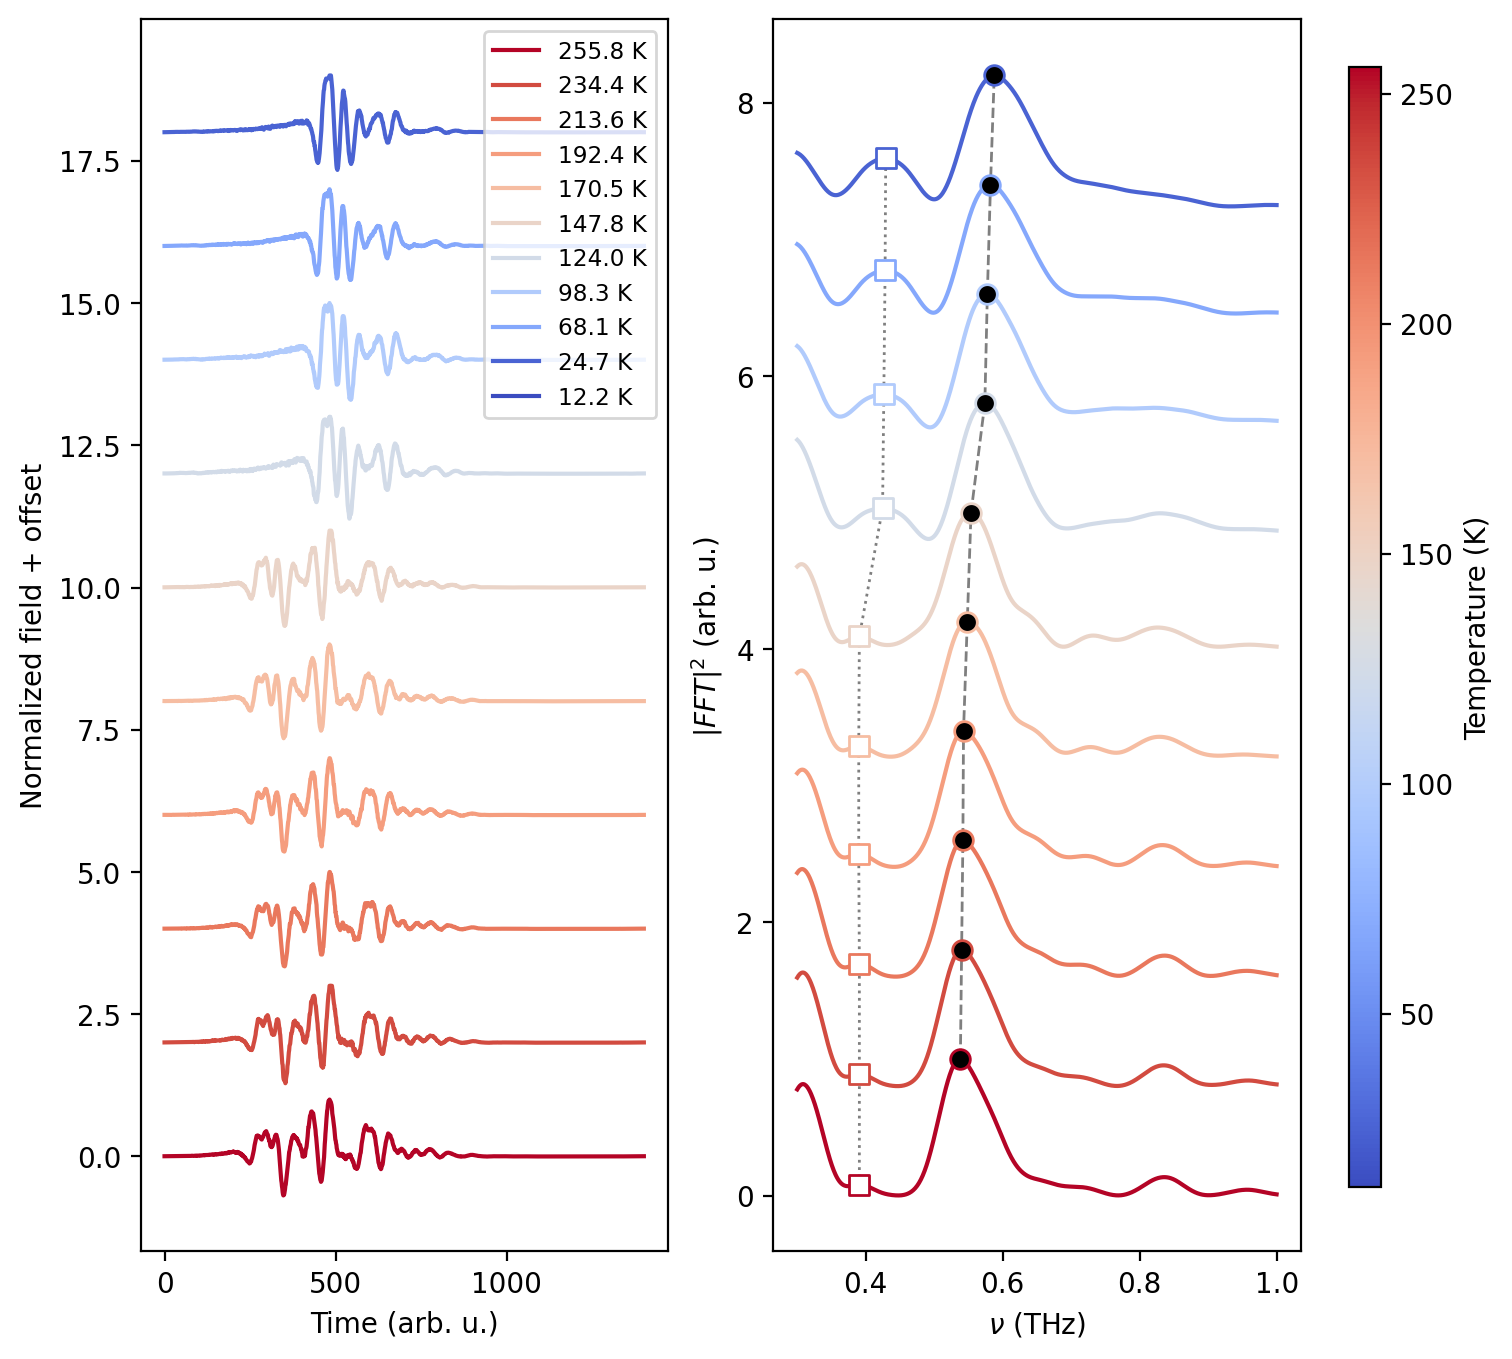

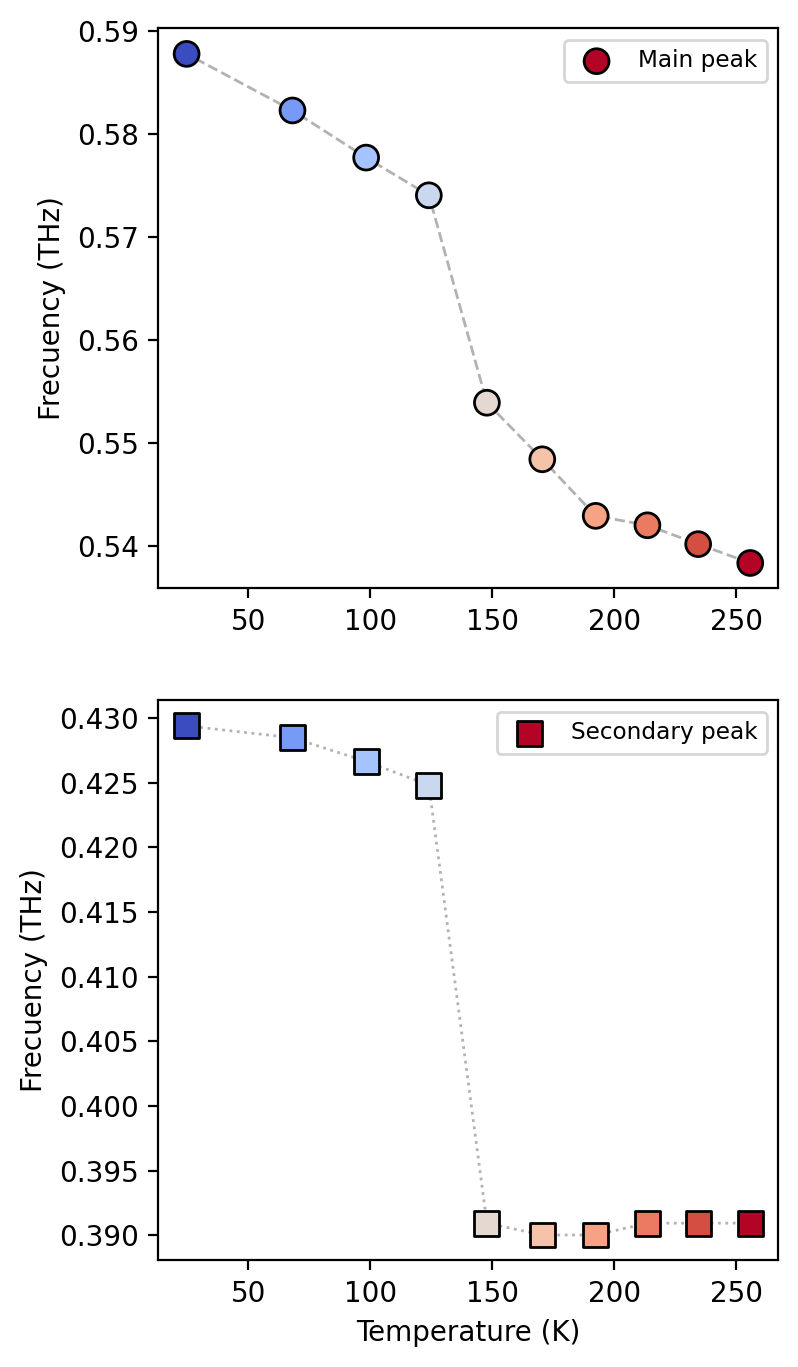

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import cm
from matplotlib.colors import Normalize
import os

def plot_all_samples(left, right_sample, right_subs, desv, d, val_offset_signal=2, val_offset_kappa=0.03):
    temps = [extraer_temperatura(p) for p in archivos_dat_samp if extraer_temperatura(p) is not None][::-1]

    if not temps:
        raise ValueError("No se encontraron temperaturas válidas en los archivos")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    N = 2**15
    params_window1 = ['gaussian', desv]
    fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(8, 8), dpi=200)

    # ax1.set_title("Señal ventaneada + ventana (todas las muestras)")
    ax1.set_ylabel("Normalized field + offset")
    ax1.set_xlabel("Time (arb. u.)")

    # ax4.set_title(r"Coeficiente de extinción $\kappa$ (todas las muestras)")
    ax4.set_xlabel(r"$\nu$ (THz)")
    ax4.set_ylabel(r"$|FFT|^{2}$ (arb. u.)")

    # Antes del bucle, creamos listas para almacenar los máximos
    max1_freqs = []
    max1_values = []
    max2_freqs = []
    max2_values = []

    for index, path_signal in enumerate(archivos_dat_samp):
        temp = temps[index]
        color = cmap(norm(temp)) if temp is not None else 'blue'
        path_ref = archivos_dat_ref[0]

        phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
            path_signal, path_ref, left, right_sample, right_subs, params_window1)

        y_subs_ventana = pd.Series(y_substrate_padding * ventana)
        y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

        offset_signal = val_offset_signal * index

        ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + offset_signal, color=color, label=f'{temp:.1f} K')

        # FFT y kappa
        k = 15
        nu = sp.fft.fftfreq(N, 1 / 30)
        fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)//k]
        fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)//k]

        nu = nu[1:len(nu)//k]
        xmin, xmax = 0.3, 1.0
        mask = (nu >= xmin) & (nu <= xmax)

        fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
        fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
        nu_filtradas = nu[mask]

        val_offset_kappa = 0.8
        offset_kappa = val_offset_kappa * index
        
        normalized_fft = np.abs(fft_y_signal_ventaneada)**2/np.max(np.abs(fft_y_signal_ventaneada)**2) + offset_kappa
        
        ax4.plot(nu_filtradas, normalized_fft, color=color, label=f'{temp:.1f} K')
        
        max1_idx = np.argmax(normalized_fft)
        max1_freq = nu_filtradas[max1_idx]
        max1_val = normalized_fft[max1_idx]
                
            # Segundo máximo (entre 0.7 y 0.9 THz)
        mask_second_peak = (nu_filtradas >= 0.38) & (nu_filtradas <= 0.45)
        if np.any(mask_second_peak):  # Verificamos que haya datos en este rango
            second_peak_region = normalized_fft[mask_second_peak]
            second_peak_nu = nu_filtradas[mask_second_peak]
            max2_idx = np.argmax(second_peak_region)
            max2_freq = second_peak_nu[max2_idx]
            max2_val = second_peak_region[max2_idx]
        else:
            max2_freq, max2_val = np.nan, np.nan
        
        # Guardamos los máximos
        max1_freqs.append(max1_freq)
        max1_values.append(max1_val)
        max2_freqs.append(max2_freq)
        max2_values.append(max2_val)
        
        # Graficamos ambos puntos máximos
        ax4.scatter(max1_freq, max1_val, color='black', edgecolors=color, s=50, zorder=5)
        if not np.isnan(max2_freq):  # Solo graficar si existe el segundo máximo
            ax4.scatter(max2_freq, max2_val, color='white', edgecolors=color, s=50, zorder=5, marker='s')
        
        print(temp)
        # Después del bucle, unimos los puntos máximos con líneas
    ax4.plot(max1_freqs, max1_values, 'k--', linewidth=1, alpha=0.5, label='1er máximo')
    if any(not np.isnan(f) for f in max2_freqs):  # Solo graficar si hay segundos máximos
        ax4.plot(max2_freqs, max2_values, 'k:', linewidth=1, alpha=0.5, label='2do máximo')
    ax1.legend(loc='upper right', fontsize='small')
    # ax4.legend(loc='upper left', fontsize='small')

    # Barra de temperatura al costado
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, cax=cbar_ax, label='Temperature (K)')

    # plt.show()

        # Crear nueva figura para frecuencia vs temperatura
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4, 8), dpi=200)

    # Graficar primer máximo (principal)
    ax1.scatter(temps[:-1], max1_freqs[:-1], c=temps[:-1], cmap='coolwarm', 
                edgecolors='k', s=80, label='Main peak', zorder=3)
    ax1.legend(loc='upper right', fontsize='small')
    ax1.plot(temps[:-1], max1_freqs[:-1], 'k--', alpha=0.3, linewidth=1)

    # Graficar segundo máximo (secundario, solo si existen valores válidos)
    valid_max2 = [(t, f) for t, f in zip(temps, max2_freqs) if not np.isnan(f)]
    if valid_max2:
        temps_max2, freqs_max2 = zip(*valid_max2)
        ax2.scatter(temps_max2[:-1], freqs_max2[:-1], c=temps_max2[:-1], cmap='coolwarm', 
                    edgecolors='k', s=80, marker='s', label='Secondary peak', zorder=3)
        ax2.set_xlabel('Temperature (K)')
        ax2.legend(loc='upper right', fontsize='small')
        ax2.set_ylabel('Frecuency (THz)')
    if valid_max2:
        ax2.plot(temps_max2[:-1] ,freqs_max2[:-1], 'k:', alpha=0.3, linewidth=1)

    # Añadir líneas de tendencia (opcional)
    # ax1.plot(temps, max1_freqs, 'k--', alpha=0.3, linewidth=1)
    # if valid_max2:
    #     ax1.plot(temps_max2, freqs_max2, 'k:', alpha=0.3, linewidth=1)

    # Ajustes estéticos
    # ax1.set_xlabel('Temperature (K)')
    ax1.set_ylabel('Frecuency (THz)')
    # ax1.title('Frecuencia de máximos vs Temperatura', fontsize=14)
    # ax1.grid(True, alpha=0.3)


# Ejecutar la función
plot_all_samples(left=57.0, right_sample=65.5, right_subs=65, desv=170.0, d=0.627)


# Sample3

In [32]:


# sample1_ang_csv = os.path.join(ruta_actual,"sample1_ang.csv")
carpeta_sample1 = os.path.join(ruta_actual,"EuZn2P2\\src\\sample3_ang")
carpeta_ref_sample1 = os.path.join(ruta_actual,"EuZn2P2\\src\\reference3")
archivos_dat_ref = glob(os.path.join(os.path.join(carpeta_ref_sample1,'carpeta1'), '*.dat'))
archivos_dat_samp = glob(os.path.join(os.path.join(carpeta_sample1,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat_samp:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

convert_dats(carpeta_ref_sample1,1)
convert_dats(carpeta_sample1,3)

# Filtrar y ordenar los archivos por la temperatura
archivos_dat_ref = sorted(
    archivos_dat_ref,
    key=lambda x: extraer_temperatura(x)
)

archivos_dat_samp = sorted(
    archivos_dat_samp,
    key=lambda x: extraer_temperatura(x)
)

Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample3_ang\carpeta1\Average_101.5K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample3_ang\carpeta1\Average_105.8K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample3_ang\carpeta1\Average_109.9K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample3_ang\carpeta1\Average_114.2K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample3_ang\carpeta1\Average_118.3K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample3_ang\carpeta1\Average_122.5K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample3_ang\carpeta1\Average_126.6K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample3_ang\carpeta1\Average_130.7K.dat eli

In [33]:
archivos_dat_ref

['c:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics\\EuZn2P2\\src\\reference3\\carpeta1\\Average_294.05K.dat']

In [96]:
from matplotlib import pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact, FloatSlider
import numpy as np
import pandas as pd
import scipy as sp

def anim2(left, right_sample, right_subs, index, desv, d):
    right_ref = right_subs
    N = 2**15

    f = plt.figure(figsize=(10, 8), dpi=200)  # Aumenté el tamaño para 3 subplots

    # Grid: 2 filas, 2 columnas (la última celda ocupará ambas columnas)
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

    # Subgráficos
    ax1 = plt.subplot(gs[0, 0])  # Señales temporales (original)
    ax2 = plt.subplot(gs[0, 1])  # FFTs (nuevo)
    ax3 = plt.subplot(gs[1, :])  # Absorción (ocupa toda la fila inferior)

    # Ruta del archivo de señal y de referencia
    path_signal = archivos_dat_samp[int(index)]
    path_ref = archivos_dat_ref[0]

    # Ventana y señales procesadas
    params_window1 = ['gaussian',desv]
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
        path_signal, path_ref, left, right_sample, right_subs, params_window1
    )

    # Aplicar ventana
    y_subs_ventana = pd.Series(y_substrate_padding * ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

    val = 2  # Desplazamiento para visualización

    # Señales en dominio temporal (subplot 1)
    ax1.plot(y_subs_ventana / max(y_subs_ventana), 'r', label='Ref')
    ax1.plot(ventana / max(ventana), 'k--', label='Window')
    ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + val,'b', label=f'Sam+{extraer_temperatura(path_signal)} K')
    ax1.plot(ventana / max(ventana) + val, 'k--')
    # ax1.set_title("Time Domain Signals")
    ax1.legend(loc='lower right')

    # Dominio de frecuencia
    nu = sp.fft.fftfreq(N, 1/30)
    k = 15
    nu = nu[1:len(nu)//k]

    # Aplicar Fourier y truncar
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)+1]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)+1]

    # Máscara de frecuencia
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    # Subplot 2: FFTs
    ax2.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)**2/np.abs(max(np.abs(fft_y_signal_ventaneada)**2)),'b', label='Sample FFT')
    ax2.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada)**2/np.abs(max(np.abs(fft_y_subs_ventaneada)**2)),'r', label='Reference FFT')
    ax2.set_title("Frequency Domain")
    ax2.set_ylabel("$|FFT|^{2}$")
    ax2.set_xlabel(r"$\nu$ (THz)")
    ax2.legend()

    # Transmitancia y fase
    T = fft_y_signal_ventaneada / fft_y_subs_ventaneada * np.exp(-1j * 2 * np.pi * nu_filtradas * phase / 30)
    
    # Subplot 3: Absorción (ocupa toda la fila inferior)
    ax3.plot(nu_filtradas, -2 / d * np.log(abs(T)),'b')
    ax3.set_ylabel(r"$\alpha$")
    ax3.set_xlabel(r"$\nu$ (THz)")
    ax3.set_title("Absorption Spectrum")
    # ax3.set_yscale('log')  # Descomenta si quieres escala logarítmica

    plt.tight_layout()

# Interfaz interactiva (sin cambios)
opc = dict(continuous_update=False, readout_format=".3f")
interact(anim2,       
    left=FloatSlider(min=380, max=423, value=394.9, step=0.1, **opc),
    right_sample=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    right_subs=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    index=FloatSlider(min=0, max=len(archivos_dat_samp) - 1, value=0, step=1, **opc),
    desv=FloatSlider(min=0, max=1000, value=190.324, step=0.001, **opc),
    d=FloatSlider(min=0.01, max=1, value=0.627, step=0.01, **opc)
)

interactive(children=(FloatSlider(value=394.9, continuous_update=False, description='left', max=423.0, min=380…

<function __main__.anim2(left, right_sample, right_subs, index, desv, d)>

In [35]:
import matplotlib.animation as animation
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from colorsys import hsv_to_rgb
import matplotlib.cm as cm
from matplotlib.colors import Normalize


def create_frame(index, left, right_sample, right_subs, desv, d, axes, norm, cmap):
    ax1, ax2 = axes

    # Limpiar los ejes en lugar de fig.clear()
    for ax in axes:
        ax.clear()

    path_signal = archivos_dat_samp[int(index)]
    temp = extraer_temperatura(path_signal)
    color = cmap(norm(temp)) if temp is not None else 'blue'
    path_ref = archivos_dat_ref[0]

    N = 2**15
    params_window1 = ['flattop']

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
        path_signal, path_ref, left, right_sample, right_subs, params_window1)

    y_subs_ventana = pd.Series(y_substrate_padding * ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

    val = 2

    ax1.plot(y_subs_ventana / max(y_subs_ventana), 'k', label='Ref')
    ax1.plot(ventana / max(ventana), 'k--', label='Window')
    ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + val, color=color, label=f'Sam+{extraer_temperatura(path_signal)} K')
    ax1.plot(ventana / max(ventana) + val, 'k--')
    # ax1.set_title(f"T = {temp} K" if temp is not None else "Temperatura no disponible")
    ax1.legend(loc='lower right')

    k = 15
    nu = sp.fft.fftfreq(N, 1 / 30)
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)//k]

    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)

    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    nu_filtradas = nu[mask]

    T = fft_y_signal_ventaneada / fft_y_subs_ventaneada * np.exp(-1j * 2 * np.pi * nu_filtradas * phase * 1 / 30)

    T_exp = abs(T)
    phi_exp = np.unwrap(np.angle(T))

    ax2.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)**2, color=color)
    
    ax2.set_ylabel(r"$|FFT|^2$")
    # ax2.set_yscale('log')

def generate_gif():
    temps = []
    for path in archivos_dat_samp:
        temp = extraer_temperatura(path)
        if temp is not None:
            temps.append(temp)

    if not temps:
        raise ValueError("No se encontraron temperaturas válidas en los archivos")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    left = 398
    right_sample = 435.4
    right_subs = 423
    desv = 190.324
    d = 0.627

    fig = plt.figure(figsize=(8, 4), dpi=200)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])

  
    axes = [ax1, ax2]

    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, cax=cbar_ax, label='Temperature (K)')

    def animate(i):
        create_frame(i, left, right_sample, right_subs, desv, d, axes, norm, cmap)
        return axes
    carpeta = os.getcwd()
    ruta_guardado = os.path.join(carpeta, 'animacion_datos225_flattop.gif')
    ani = animation.FuncAnimation(fig, animate, frames=len(archivos_dat_samp), interval=400, blit=False)
    ani.save(ruta_guardado, writer=animation.PillowWriter(fps=2), dpi=200)
    plt.close()

# Ejecutar
generate_gif()


142.8
138.7
134.8
130.7
126.6
122.5
118.3
114.2
109.9
105.8
101.5
97.2
92.9
88.6
84.2
79.8
75.3
70.8
66.2
61.5
56.6
51.4
45.8
39.9
33.1
24.8
9.4


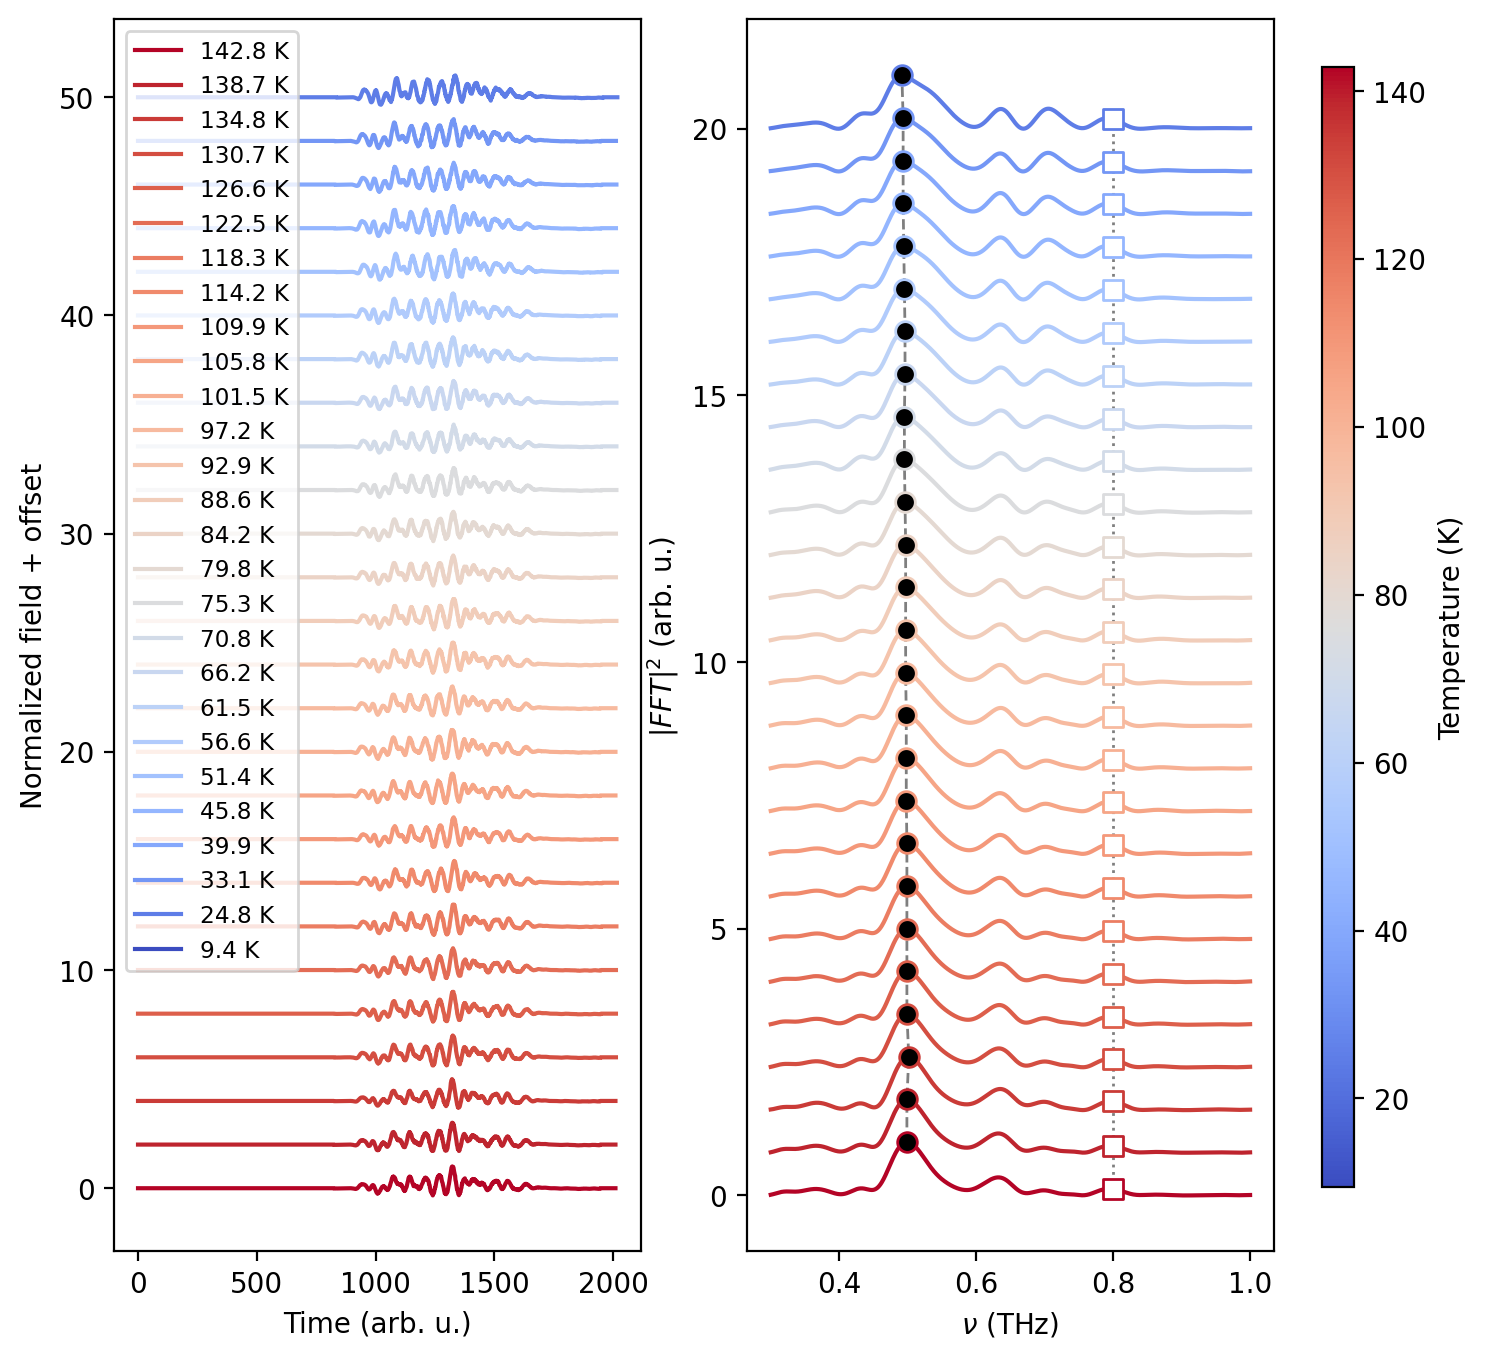

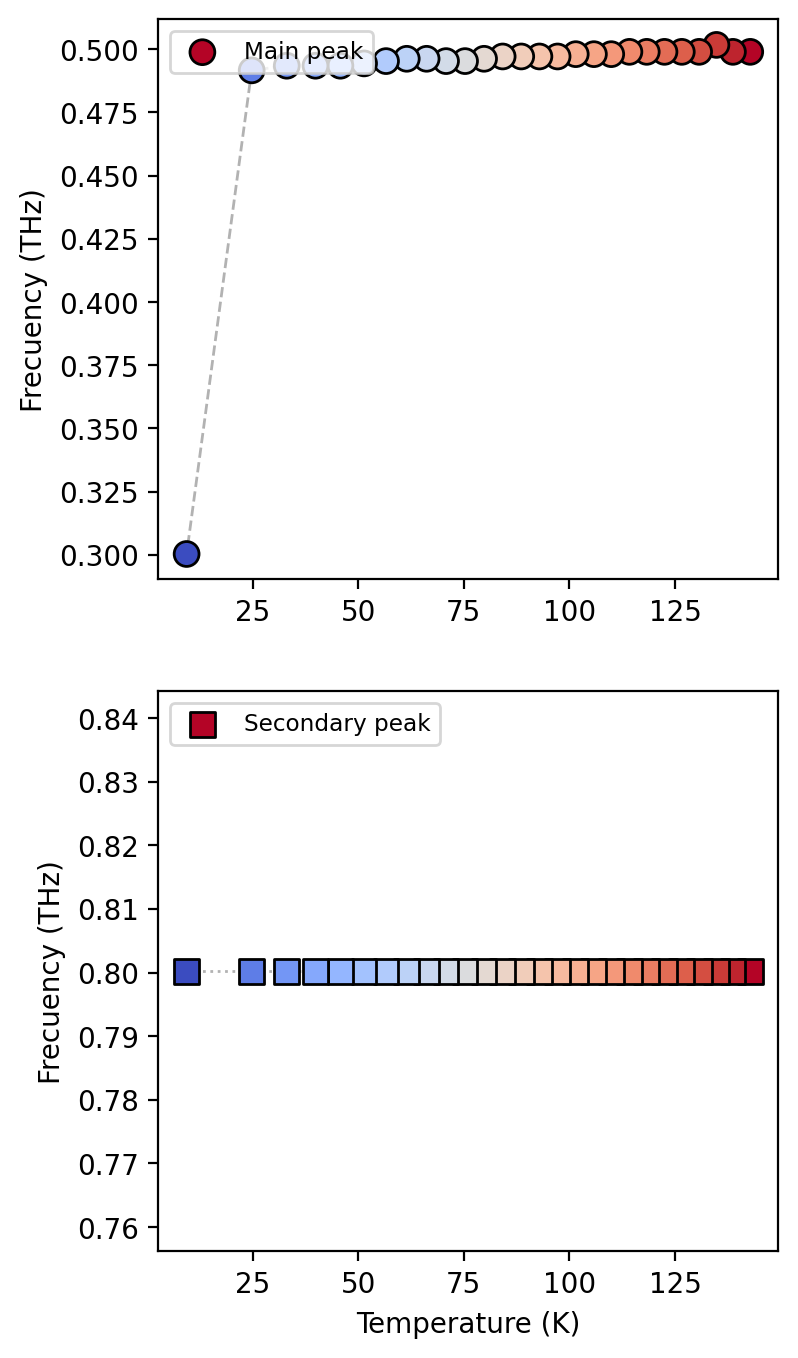

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import cm
from matplotlib.colors import Normalize
import os

def plot_all_samples(left, right_sample, right_subs, desv, d, val_offset_signal=2, val_offset_kappa=0.03):
    temps = [extraer_temperatura(p) for p in archivos_dat_samp if extraer_temperatura(p) is not None][::-1]

    if not temps:
        raise ValueError("No se encontraron temperaturas válidas en los archivos")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    N = 2**15
    params_window1 = ['flattop']
    fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(8, 8), dpi=200)

    # ax1.set_title("Señal ventaneada + ventana (todas las muestras)")
    ax1.set_ylabel("Normalized field + offset")
    ax1.set_xlabel("Time (arb. u.)")

    # ax4.set_title(r"Coeficiente de extinción $\kappa$ (todas las muestras)")
    ax4.set_xlabel(r"$\nu$ (THz)")
    ax4.set_ylabel(r"$|FFT|^{2}$ (arb. u.)")

    # Antes del bucle, creamos listas para almacenar los máximos
    max1_freqs = []
    max1_values = []
    max2_freqs = []
    max2_values = []

    for index, path_signal in enumerate(archivos_dat_samp):
        temp = temps[index]
        color = cmap(norm(temp)) if temp is not None else 'blue'
        path_ref = archivos_dat_ref[0]

        phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
            path_signal, path_ref, left, right_sample, right_subs, params_window1)

        y_subs_ventana = pd.Series(y_substrate_padding * ventana)
        y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

        offset_signal = val_offset_signal * index

        ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + offset_signal, color=color, label=f'{temp:.1f} K')

        # FFT y kappa
        k = 15
        nu = sp.fft.fftfreq(N, 1 / 30)
        fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)//k]
        fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)//k]

        nu = nu[1:len(nu)//k]
        xmin, xmax = 0.3, 1.0
        mask = (nu >= xmin) & (nu <= xmax)

        fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
        fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
        nu_filtradas = nu[mask]

        val_offset_kappa = 0.8
        offset_kappa = val_offset_kappa * index
        
        normalized_fft = np.abs(fft_y_signal_ventaneada)**2/np.max(np.abs(fft_y_signal_ventaneada)**2) + offset_kappa
        
        ax4.plot(nu_filtradas, normalized_fft, color=color, label=f'{temp:.1f} K')
        
        max1_idx = np.argmax(normalized_fft)
        max1_freq = nu_filtradas[max1_idx]
        max1_val = normalized_fft[max1_idx]
                
            # Segundo máximo (entre 0.7 y 0.9 THz)
        mask_second_peak = (nu_filtradas >= 0.8) & (nu_filtradas <= 0.9)
        if np.any(mask_second_peak):  # Verificamos que haya datos en este rango
            second_peak_region = normalized_fft[mask_second_peak]
            second_peak_nu = nu_filtradas[mask_second_peak]
            max2_idx = np.argmax(second_peak_region)
            max2_freq = second_peak_nu[max2_idx]
            max2_val = second_peak_region[max2_idx]
        else:
            max2_freq, max2_val = np.nan, np.nan
        
        # Guardamos los máximos
        max1_freqs.append(max1_freq)
        max1_values.append(max1_val)
        max2_freqs.append(max2_freq)
        max2_values.append(max2_val)
        
        # Graficamos ambos puntos máximos
        ax4.scatter(max1_freq, max1_val, color='black', edgecolors=color, s=50, zorder=5)
        if not np.isnan(max2_freq):  # Solo graficar si existe el segundo máximo
            ax4.scatter(max2_freq, max2_val, color='white', edgecolors=color, s=50, zorder=5, marker='s')
        
        print(temp)
        # Después del bucle, unimos los puntos máximos con líneas
    ax4.plot(max1_freqs, max1_values, 'k--', linewidth=1, alpha=0.5, label='1er máximo')
    if any(not np.isnan(f) for f in max2_freqs):  # Solo graficar si hay segundos máximos
        ax4.plot(max2_freqs, max2_values, 'k:', linewidth=1, alpha=0.5, label='2do máximo')
    ax1.legend(loc='upper left', fontsize='small')
    # ax4.legend(loc='upper left', fontsize='small')

    # Barra de temperatura al costado
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, cax=cbar_ax, label='Temperature (K)')

    # plt.show()

        # Crear nueva figura para frecuencia vs temperatura
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4, 8), dpi=200)

    # Graficar primer máximo (principal)
    ax1.scatter(temps, max1_freqs, c=temps, cmap='coolwarm', 
                edgecolors='k', s=80, label='Main peak', zorder=3)
    ax1.legend(loc='upper left', fontsize='small')
    ax1.plot(temps, max1_freqs, 'k--', alpha=0.3, linewidth=1)

    # Graficar segundo máximo (secundario, solo si existen valores válidos)
    valid_max2 = [(t, f) for t, f in zip(temps, max2_freqs) if not np.isnan(f)]
    if valid_max2:
        temps_max2, freqs_max2 = zip(*valid_max2)
        ax2.scatter(temps_max2, freqs_max2, c=temps_max2, cmap='coolwarm', 
                    edgecolors='k', s=80, marker='s', label='Secondary peak', zorder=3)
        ax2.set_xlabel('Temperature (K)')
        ax2.legend(loc='upper left', fontsize='small')
        ax2.set_ylabel('Frecuency (THz)')
    if valid_max2:
        ax2.plot(temps_max2, freqs_max2, 'k:', alpha=0.3, linewidth=1)

    # Añadir líneas de tendencia (opcional)
    # ax1.plot(temps, max1_freqs, 'k--', alpha=0.3, linewidth=1)
    # if valid_max2:
    #     ax1.plot(temps_max2, freqs_max2, 'k:', alpha=0.3, linewidth=1)

    # Ajustes estéticos
    # ax1.set_xlabel('Temperature (K)')
    ax1.set_ylabel('Frecuency (THz)')
    # ax1.title('Frecuencia de máximos vs Temperatura', fontsize=14)
    # ax1.grid(True, alpha=0.3)


# Ejecutar la función
plot_all_samples(left=398.0, right_sample=435.4, right_subs=423, desv=190.324, d=0.627)


# SAMPLE 4

In [25]:


# sample1_ang_csv = os.path.join(ruta_actual,"sample1_ang.csv")
carpeta_sample1 = os.path.join(ruta_actual,"EuZn2P2\\src\\sample4_ang")
carpeta_ref_sample1 = os.path.join(ruta_actual,"EuZn2P2\\src\\reference4")
archivos_dat_ref = glob(os.path.join(os.path.join(carpeta_ref_sample1,'carpeta1'), '*.dat'))
archivos_dat_samp = glob(os.path.join(os.path.join(carpeta_sample1,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat_samp:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    print(f'Archivo {archivo} eliminado.')

convert_dats(carpeta_ref_sample1,1)
convert_dats(carpeta_sample1,3)

# Filtrar y ordenar los archivos por la temperatura
archivos_dat_ref = sorted(
    archivos_dat_ref,
    key=lambda x: extraer_temperatura(x)
)

archivos_dat_samp = sorted(
    archivos_dat_samp,
    key=lambda x: extraer_temperatura(x)
)

Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample4_ang\carpeta1\Average_10.2K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample4_ang\carpeta1\Average_100.6K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample4_ang\carpeta1\Average_104.9K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample4_ang\carpeta1\Average_108.9K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample4_ang\carpeta1\Average_113.1K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample4_ang\carpeta1\Average_117.2K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample4_ang\carpeta1\Average_121.2K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample4_ang\carpeta1\Average_125.4K.dat elim

In [26]:
archivos_dat_ref


['c:\\Users\\esteb\\Escritorio\\physics\\mestrado_thz_physics\\EuZn2P2\\src\\reference4\\carpeta1\\Average_294.05K.dat']

In [29]:
from matplotlib import pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact, FloatSlider
import numpy as np
import pandas as pd
import scipy as sp

def anim2(left, right_sample, right_subs, index, desv, d):
    right_ref = right_subs
    N = 2**15

    f = plt.figure(figsize=(10, 8), dpi=200)  # Aumenté el tamaño para 3 subplots

    # Grid: 2 filas, 2 columnas (la última celda ocupará ambas columnas)
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

    # Subgráficos
    ax1 = plt.subplot(gs[0, 0])  # Señales temporales (original)
    ax2 = plt.subplot(gs[0, 1])  # FFTs (nuevo)
    ax3 = plt.subplot(gs[1, :])  # Absorción (ocupa toda la fila inferior)

    # Ruta del archivo de señal y de referencia
    path_signal = archivos_dat_samp[int(index)]
    path_ref = archivos_dat_ref[0]

    # Ventana y señales procesadas
    params_window1 = ['flattop']
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
        path_signal, path_ref, left, right_sample, right_subs, params_window1
    )

    # Aplicar ventana
    y_subs_ventana = pd.Series(y_substrate_padding * ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

    val = 2  # Desplazamiento para visualización

    # Señales en dominio temporal (subplot 1)
    ax1.plot(y_subs_ventana / max(y_subs_ventana), 'r', label='Ref')
    ax1.plot(ventana / max(ventana), 'k--', label='Window')
    ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + val,'b', label=f'Sam+{extraer_temperatura(path_signal)} K')
    ax1.plot(ventana / max(ventana) + val, 'k--')
    # ax1.set_title("Time Domain Signals")
    ax1.legend(loc='lower right')

    # Dominio de frecuencia
    nu = sp.fft.fftfreq(N, 1/30)
    k = 15
    nu = nu[1:len(nu)//k]

    # Aplicar Fourier y truncar
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)+1]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)+1]

    # Máscara de frecuencia
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    # Subplot 2: FFTs
    ax2.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)**2/np.abs(max(np.abs(fft_y_signal_ventaneada)**2)),'b', label='Sample FFT')
    ax2.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada)**2/np.abs(max(np.abs(fft_y_subs_ventaneada)**2)),'r', label='Reference FFT')
    ax2.set_title("Frequency Domain")
    ax2.set_ylabel("$|FFT|^{2}$")
    ax2.set_xlabel(r"$\nu$ (THz)")
    ax2.legend()

    # Transmitancia y fase
    T = fft_y_signal_ventaneada / fft_y_subs_ventaneada * np.exp(-1j * 2 * np.pi * nu_filtradas * phase / 30)
    
    # Subplot 3: Absorción (ocupa toda la fila inferior)
    ax3.plot(nu_filtradas, -2 / d * np.log(abs(T)),'b')
    ax3.set_ylabel(r"$\alpha$")
    ax3.set_xlabel(r"$\nu$ (THz)")
    ax3.set_title("Absorption Spectrum")
    # ax3.set_yscale('log')  # Descomenta si quieres escala logarítmica

    plt.tight_layout()

# Interfaz interactiva (sin cambios)
opc = dict(continuous_update=False, readout_format=".3f")
interact(anim2,       
    left=FloatSlider(min=380, max=423, value=394.9, step=0.1, **opc),
    right_sample=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    right_subs=FloatSlider(min=380, max=450, value=417.9, step=0.1, **opc),
    index=FloatSlider(min=0, max=len(archivos_dat_samp) - 1, value=0, step=1, **opc),
    desv=FloatSlider(min=0, max=1000, value=190.324, step=0.001, **opc),
    d=FloatSlider(min=0.01, max=1, value=0.627, step=0.01, **opc)
)

interactive(children=(FloatSlider(value=394.9, continuous_update=False, description='left', max=423.0, min=380…

<function __main__.anim2(left, right_sample, right_subs, index, desv, d)>

In [31]:
import matplotlib.animation as animation
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from colorsys import hsv_to_rgb
import matplotlib.cm as cm
from matplotlib.colors import Normalize


def create_frame(index, left, right_sample, right_subs, desv, d, axes, norm, cmap):
    ax1, ax2 = axes

    # Limpiar los ejes en lugar de fig.clear()
    for ax in axes:
        ax.clear()

    path_signal = archivos_dat_samp[int(index)]
    temp = extraer_temperatura(path_signal)
    color = cmap(norm(temp)) if temp is not None else 'blue'
    path_ref = archivos_dat_ref[0]

    N = 2**15
    params_window1 = ['flattop']

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
        path_signal, path_ref, left, right_sample, right_subs, params_window1)

    y_subs_ventana = pd.Series(y_substrate_padding * ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

    val = 2

    ax1.plot(y_subs_ventana / max(y_subs_ventana), 'k', label='Ref')
    ax1.plot(ventana / max(ventana), 'k--', label='Window')
    ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + val, color=color, label=f'Sam+{extraer_temperatura(path_signal)} K')
    ax1.plot(ventana / max(ventana) + val, 'k--')
    # ax1.set_title(f"T = {temp} K" if temp is not None else "Temperatura no disponible")
    ax1.legend(loc='lower right')

    k = 15
    nu = sp.fft.fftfreq(N, 1 / 30)
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)//k]

    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)

    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    nu_filtradas = nu[mask]

    T = fft_y_signal_ventaneada / fft_y_subs_ventaneada * np.exp(-1j * 2 * np.pi * nu_filtradas * phase * 1 / 30)

    T_exp = abs(T)
    phi_exp = np.unwrap(np.angle(T))

    ax2.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)**2, color=color)
    
    ax2.set_ylabel(r"$|FFT|^2$")
    # ax2.set_yscale('log')

def generate_gif():
    temps = []
    for path in archivos_dat_samp:
        temp = extraer_temperatura(path)
        if temp is not None:
            temps.append(temp)

    if not temps:
        raise ValueError("No se encontraron temperaturas válidas en los archivos")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    left = 397.3
    right_sample = 432.60
    right_subs = 428.1
    desv = 190.324
    d = 0.627

    fig = plt.figure(figsize=(8, 4), dpi=200)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])

  
    axes = [ax1, ax2]

    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, cax=cbar_ax, label='Temperature (K)')

    def animate(i):
        create_frame(i, left, right_sample, right_subs, desv, d, axes, norm, cmap)
        return axes
    carpeta = os.getcwd()
    ruta_guardado = os.path.join(carpeta, 'animacion_datos225.gif')
    ani = animation.FuncAnimation(fig, animate, frames=len(archivos_dat_samp), interval=400, blit=False)
    ani.save(ruta_guardado, writer=animation.PillowWriter(fps=2), dpi=200)
    plt.close()

# Ejecutar
generate_gif()


171.0
167.5
163.9
160.2
156.5
152.8
148.9
145.2
141.2
137.3
133.4
129.3
125.4
121.2
117.2
113.1
108.9
104.9
100.6
96.4
92.2
87.9
83.6
79.3
74.9
70.4
65.9
61.3
56.4
51.3
45.8
39.9
33.4
25.5
10.2


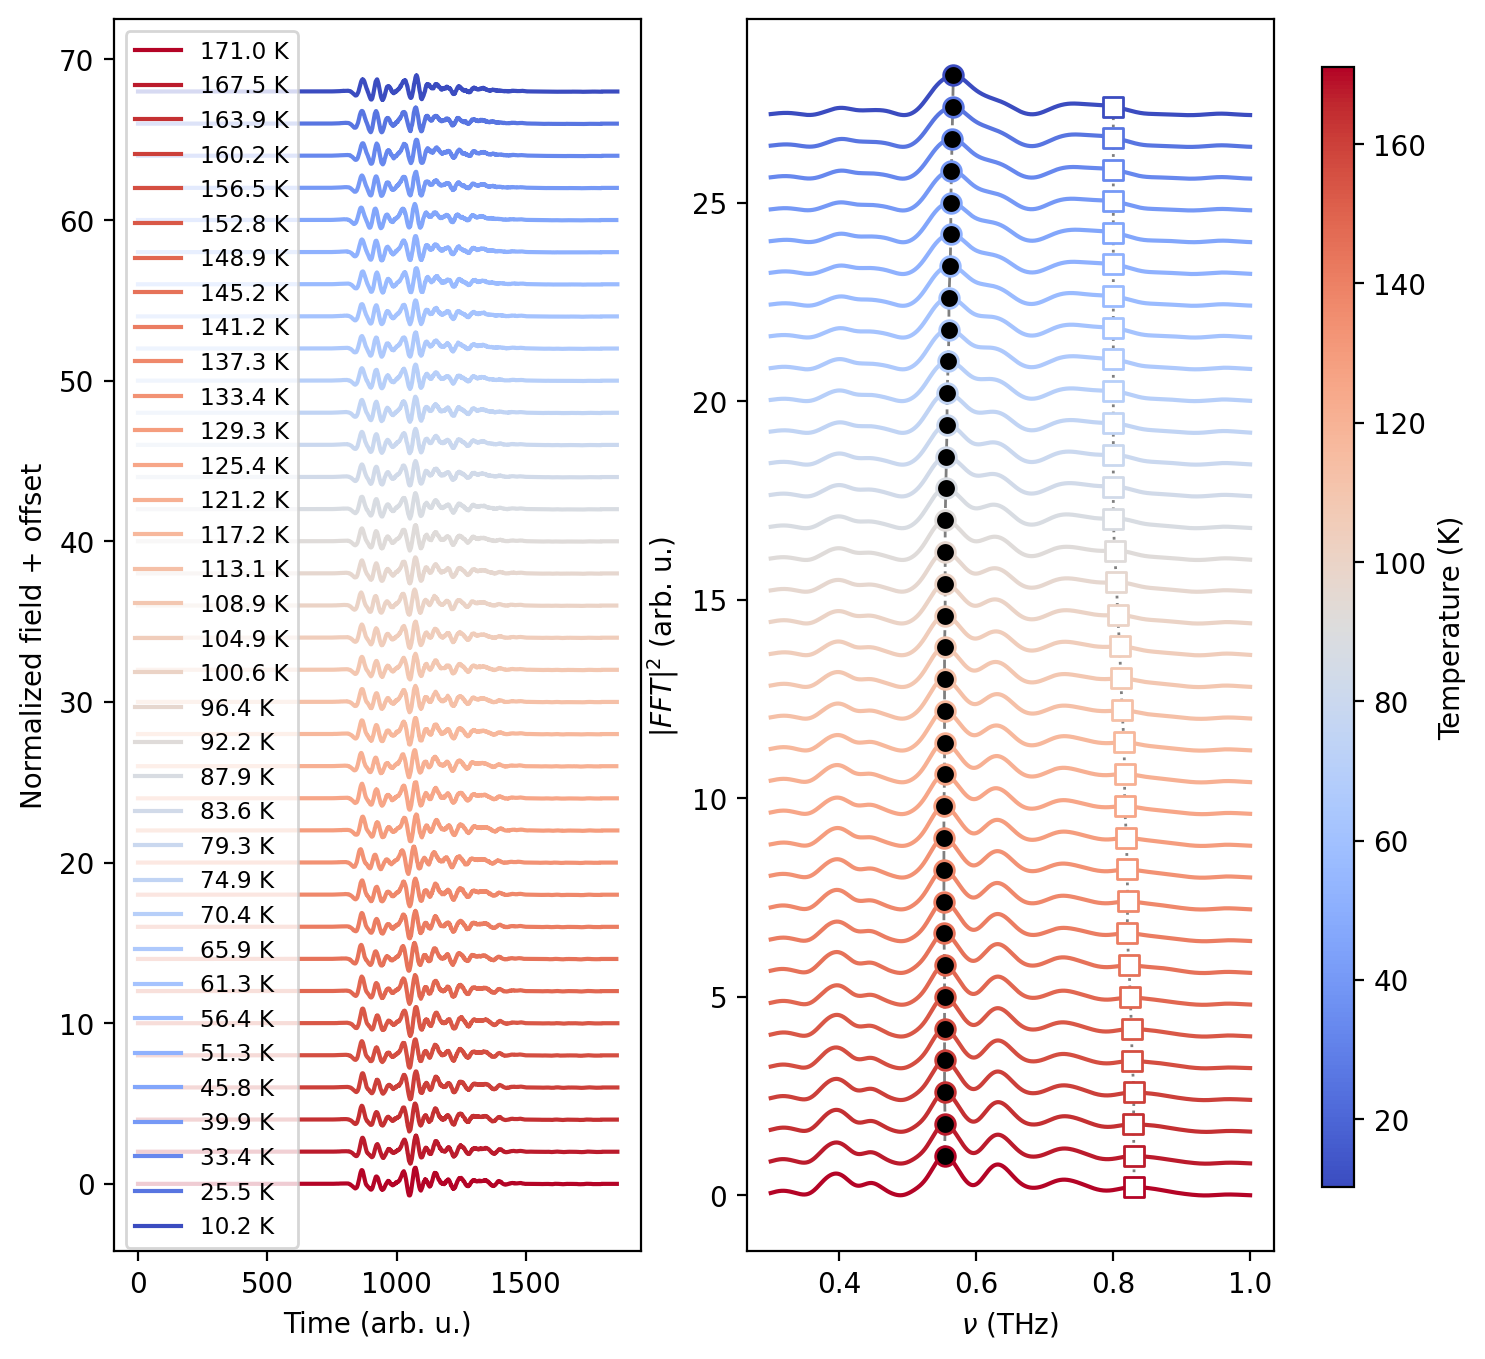

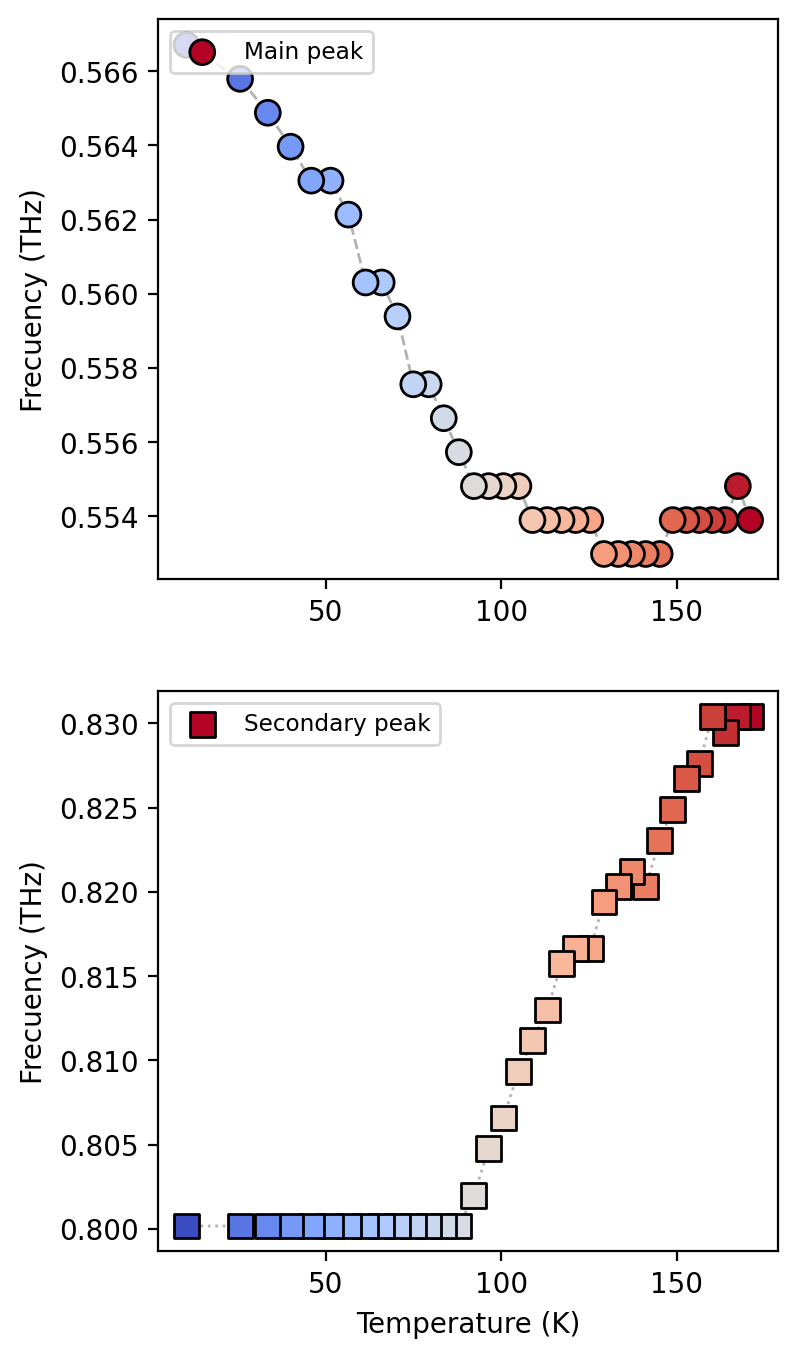

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import cm
from matplotlib.colors import Normalize
import os

def plot_all_samples(left, right_sample, right_subs, desv, d, val_offset_signal=2, val_offset_kappa=0.03):
    temps = [extraer_temperatura(p) for p in archivos_dat_samp if extraer_temperatura(p) is not None][::-1]

    if not temps:
        raise ValueError("No se encontraron temperaturas válidas en los archivos")

    min_temp, max_temp = min(temps), max(temps)
    norm = Normalize(vmin=min_temp, vmax=max_temp)
    cmap = cm.coolwarm

    N = 2**15
    params_window1 = ['flattop']
    fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(8, 8), dpi=200)

    # ax1.set_title("Señal ventaneada + ventana (todas las muestras)")
    ax1.set_ylabel("Normalized field + offset")
    ax1.set_xlabel("Time (arb. u.)")

    # ax4.set_title(r"Coeficiente de extinción $\kappa$ (todas las muestras)")
    ax4.set_xlabel(r"$\nu$ (THz)")
    ax4.set_ylabel(r"$|FFT|^{2}$ (arb. u.)")

    # Antes del bucle, creamos listas para almacenar los máximos
    max1_freqs = []
    max1_values = []
    max2_freqs = []
    max2_values = []

    for index, path_signal in enumerate(archivos_dat_samp):
        temp = temps[index]
        color = cmap(norm(temp)) if temp is not None else 'blue'
        path_ref = archivos_dat_ref[0]

        phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(
            path_signal, path_ref, left, right_sample, right_subs, params_window1)

        y_subs_ventana = pd.Series(y_substrate_padding * ventana)
        y_signal_ventaneada = pd.Series(y_signal_ventaneada * ventana)

        offset_signal = val_offset_signal * index

        ax1.plot(y_signal_ventaneada / max(y_signal_ventaneada) + offset_signal, color=color, label=f'{temp:.1f} K')

        # FFT y kappa
        k = 15
        nu = sp.fft.fftfreq(N, 1 / 30)
        fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada, N)[1:len(nu)//k]
        fft_y_subs_ventaneada = FourierT2(y_subs_ventana, N)[1:len(nu)//k]

        nu = nu[1:len(nu)//k]
        xmin, xmax = 0.3, 1.0
        mask = (nu >= xmin) & (nu <= xmax)

        fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
        fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
        nu_filtradas = nu[mask]

        val_offset_kappa = 0.8
        offset_kappa = val_offset_kappa * index
        
        normalized_fft = np.abs(fft_y_signal_ventaneada)**2/np.max(np.abs(fft_y_signal_ventaneada)**2) + offset_kappa
        
        ax4.plot(nu_filtradas, normalized_fft, color=color, label=f'{temp:.1f} K')
        
        max1_idx = np.argmax(normalized_fft)
        max1_freq = nu_filtradas[max1_idx]
        max1_val = normalized_fft[max1_idx]
                
            # Segundo máximo (entre 0.7 y 0.9 THz)
        mask_second_peak = (nu_filtradas >= 0.8) & (nu_filtradas <= 0.9)
        if np.any(mask_second_peak):  # Verificamos que haya datos en este rango
            second_peak_region = normalized_fft[mask_second_peak]
            second_peak_nu = nu_filtradas[mask_second_peak]
            max2_idx = np.argmax(second_peak_region)
            max2_freq = second_peak_nu[max2_idx]
            max2_val = second_peak_region[max2_idx]
        else:
            max2_freq, max2_val = np.nan, np.nan
        
        # Guardamos los máximos
        max1_freqs.append(max1_freq)
        max1_values.append(max1_val)
        max2_freqs.append(max2_freq)
        max2_values.append(max2_val)
        
        # Graficamos ambos puntos máximos
        ax4.scatter(max1_freq, max1_val, color='black', edgecolors=color, s=50, zorder=5)
        if not np.isnan(max2_freq):  # Solo graficar si existe el segundo máximo
            ax4.scatter(max2_freq, max2_val, color='white', edgecolors=color, s=50, zorder=5, marker='s')
        
        print(temp)
        # Después del bucle, unimos los puntos máximos con líneas
    ax4.plot(max1_freqs, max1_values, 'k--', linewidth=1, alpha=0.5, label='1er máximo')
    if any(not np.isnan(f) for f in max2_freqs):  # Solo graficar si hay segundos máximos
        ax4.plot(max2_freqs, max2_values, 'k:', linewidth=1, alpha=0.5, label='2do máximo')
    ax1.legend(loc='upper left', fontsize='small')
    # ax4.legend(loc='upper left', fontsize='small')

    # Barra de temperatura al costado
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, cax=cbar_ax, label='Temperature (K)')

    # plt.show()

        # Crear nueva figura para frecuencia vs temperatura
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4, 8), dpi=200)

    # Graficar primer máximo (principal)
    ax1.scatter(temps, max1_freqs, c=temps, cmap='coolwarm', 
                edgecolors='k', s=80, label='Main peak', zorder=3)
    ax1.legend(loc='upper left', fontsize='small')
    ax1.plot(temps, max1_freqs, 'k--', alpha=0.3, linewidth=1)

    # Graficar segundo máximo (secundario, solo si existen valores válidos)
    valid_max2 = [(t, f) for t, f in zip(temps, max2_freqs) if not np.isnan(f)]
    if valid_max2:
        temps_max2, freqs_max2 = zip(*valid_max2)
        ax2.scatter(temps_max2, freqs_max2, c=temps_max2, cmap='coolwarm', 
                    edgecolors='k', s=80, marker='s', label='Secondary peak', zorder=3)
        ax2.set_xlabel('Temperature (K)')
        ax2.legend(loc='upper left', fontsize='small')
        ax2.set_ylabel('Frecuency (THz)')
    if valid_max2:
        ax2.plot(temps_max2, freqs_max2, 'k:', alpha=0.3, linewidth=1)

    # Añadir líneas de tendencia (opcional)
    # ax1.plot(temps, max1_freqs, 'k--', alpha=0.3, linewidth=1)
    # if valid_max2:
    #     ax1.plot(temps_max2, freqs_max2, 'k:', alpha=0.3, linewidth=1)

    # Ajustes estéticos
    # ax1.set_xlabel('Temperature (K)')
    ax1.set_ylabel('Frecuency (THz)')
    # ax1.title('Frecuencia de máximos vs Temperatura', fontsize=14)
    # ax1.grid(True, alpha=0.3)


# Ejecutar la función
plot_all_samples(left=397.3, right_sample=432.60, right_subs=428.1, desv=190.324, d=0.627)
